## Final Project Submission

Please fill out:
* Student name: David Schenck
* Student pace: Flex
* Scheduled project review date/time: 
* Instructor name: Morgan Jones
* Blog post URL: https://daviddata24.wordpress.com/2023/06/10/a-predictive-soccer-model-part-1/


## Project Description
Data: The data used in this project provides details on houses sold in King County, WA between June 10, 2021 and June 9,2022.
The data includes information about the price, features of the home (such as square footage, number of rooms, condition, environoment).

Stakeholder: The stakeholder is a real estate agency in the King County area.

Business Problem: The real estate agency wants to be able to set realistic prices on homes being put on the market. Setting prices too low means they and the seller get less money and setting the prices too high means the houses will be more difficult to sell. The real estate agency also wants to be able to provide guidance to sellers about how they can raise the value of their home.

Method: I will create a model that will be able to estimate the value of a house based on what features it has. The model will be created by using linear regression.

## Data Exploration

In [297]:
# Modules
import numpy as np
import pandas as pd
import scipy.stats as stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('ggplot')

In [298]:
# Read in data
df = pd.read_csv('data/kc_house_data.csv')
df

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
0,7399300360,5/24/2022,675000.0,4,1.0,1180,7140,1.0,NO,NO,...,PUBLIC,1180,0,0,40,1969,0,"2102 Southeast 21st Court, Renton, Washington ...",47.461975,-122.19052
1,8910500230,12/13/2021,920000.0,5,2.5,2770,6703,1.0,NO,NO,...,PUBLIC,1570,1570,0,240,1950,0,"11231 Greenwood Avenue North, Seattle, Washing...",47.711525,-122.35591
2,1180000275,9/29/2021,311000.0,6,2.0,2880,6156,1.0,NO,NO,...,PUBLIC,1580,1580,0,0,1956,0,"8504 South 113th Street, Seattle, Washington 9...",47.502045,-122.22520
3,1604601802,12/14/2021,775000.0,3,3.0,2160,1400,2.0,NO,NO,...,PUBLIC,1090,1070,200,270,2010,0,"4079 Letitia Avenue South, Seattle, Washington...",47.566110,-122.29020
4,8562780790,8/24/2021,592500.0,2,2.0,1120,758,2.0,NO,NO,...,PUBLIC,1120,550,550,30,2012,0,"2193 Northwest Talus Drive, Issaquah, Washingt...",47.532470,-122.07188
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,11/30/2021,1555000.0,5,2.0,1910,4000,1.5,NO,NO,...,PUBLIC,1600,1130,0,210,1921,0,"4673 Eastern Avenue North, Seattle, Washington...",47.664740,-122.32940
30151,194000695,6/16/2021,1313000.0,3,2.0,2020,5800,2.0,NO,NO,...,PUBLIC,2020,0,0,520,2011,0,"4131 44th Avenue Southwest, Seattle, Washingto...",47.565610,-122.38851
30152,7960100080,5/27/2022,800000.0,3,2.0,1620,3600,1.0,NO,NO,...,PUBLIC,940,920,240,110,1995,0,"910 Martin Luther King Jr Way, Seattle, Washin...",47.610395,-122.29585
30153,2781280080,2/24/2022,775000.0,3,2.5,2570,2889,2.0,NO,NO,...,PUBLIC,1830,740,480,100,2006,0,"17127 114th Avenue Southeast, Renton, Washingt...",47.449490,-122.18908


The data includes 30,155 records.<br>

There is a mix of continuous numeric, discrete numeric, and categorical data.

The target variable is going to be the price.

In [299]:
# Look at columns and dtypes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30155 entries, 0 to 30154
Data columns (total 25 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             30155 non-null  int64  
 1   date           30155 non-null  object 
 2   price          30155 non-null  float64
 3   bedrooms       30155 non-null  int64  
 4   bathrooms      30155 non-null  float64
 5   sqft_living    30155 non-null  int64  
 6   sqft_lot       30155 non-null  int64  
 7   floors         30155 non-null  float64
 8   waterfront     30155 non-null  object 
 9   greenbelt      30155 non-null  object 
 10  nuisance       30155 non-null  object 
 11  view           30155 non-null  object 
 12  condition      30155 non-null  object 
 13  grade          30155 non-null  object 
 14  heat_source    30123 non-null  object 
 15  sewer_system   30141 non-null  object 
 16  sqft_above     30155 non-null  int64  
 17  sqft_basement  30155 non-null  int64  
 18  sqft_g

There are some columns with missing data:<br>
heat_source: Missing 32<br>
sewer_system: Missing 14

In [300]:
# Convert date to datetime
df.date = pd.to_datetime(df.date)

In [301]:
print(f"Earliest date: {df.date.min()}   Latest date: {df.date.max()}")

Earliest date: 2021-06-10 00:00:00   Latest date: 2022-06-09 00:00:00


The data represents one year from June 10, 2021 to June 9, 2022

In [302]:
# Look at value counts for each column
for col in df.columns:
    print('COLUMN:',col)
    print(df[col].value_counts())
    print()

COLUMN: id
1233100736    2
2026059180    1
1423089049    1
3892500020    1
7321900035    1
             ..
1946000070    1
1250201175    1
5422570190    1
691000015     1
9430110210    1
Name: id, Length: 30154, dtype: int64

COLUMN: date
2021-07-01    196
2021-08-02    186
2021-07-06    176
2021-06-23    176
2021-06-16    174
             ... 
2021-12-25      1
2021-12-05      1
2022-01-16      1
2021-12-26      1
2022-06-09      1
Name: date, Length: 365, dtype: int64

COLUMN: price
650000.0     346
750000.0     307
800000.0     299
850000.0     296
600000.0     295
            ... 
838355.0       1
903888.0       1
576200.0       1
1081500.0      1
720902.0       1
Name: price, Length: 5202, dtype: int64

COLUMN: bedrooms
3     12754
4      9597
2      3936
5      2798
6       498
1       391
7        80
0        44
8        38
9        14
10        3
13        1
11        1
Name: bedrooms, dtype: int64

COLUMN: bathrooms
2.5     8475
2.0     7349
1.0     4576
3.0     4117
3.5     2

All of the column IDs are unique EXCEPT for 1233100736. Let's look those two records.

In [305]:
df[df['id'] == 1233100736]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sewer_system,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long
4845,1233100736,2021-09-28,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135
4846,1233100736,2021-09-28,2600000.0,3,4.0,3500,8455,2.0,NO,NO,...,PUBLIC,2590,1410,500,290,2019,0,"12611 Northeast 87th Place, Kirkland, Washingt...",47.68069,-122.172135


This is a repeat, so I will remove record 4846.

In [306]:
df.drop(index = 4846, inplace = True)

### Location Data

Below is a plot of latitude and longitude. You can see a vague impression of the shape of the United States (with Alaska in the top left and Hawaii in the bottom left)<br>

The data description says that all of the data is actually from King County in Washington state. All of the addresses, latitudes, and longitudes that are not in King County are errors. It is okay to keep the data in if I am not going to use geography for my analysis, but I should remove anything that isn't in Washington if I do want to use the location data.

<AxesSubplot:xlabel='long', ylabel='lat'>

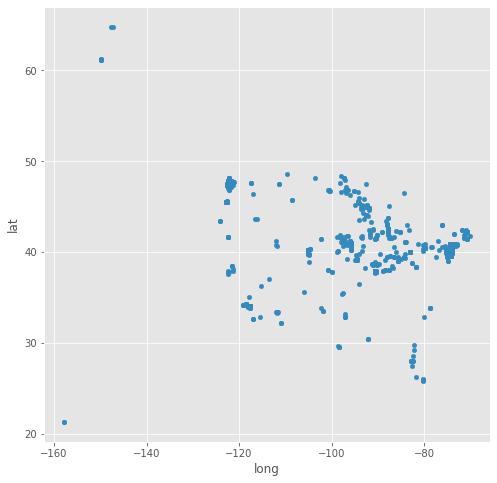

In [315]:
# Look at locations of the homes in the data
fig, ax = plt.subplots( figsize = (8,8) )
df.plot.scatter(x = 'long', y = 'lat', ax = ax)

Below, I use the addresses to find the state and zip code of each record.<br>

Again, the data is actually all from Washington state, but there are errors in finding latitude, longitude, and state for about 3% of the data.

In [316]:
def find_state(x):
    """
    This function takes the addresses in the data and finds the state.
    This is made straightforward because the last word of the state is
    always in position -4 after splitting the data.
    """
    last_word = x.split()[-4]
    word = x.split()[-4]
    if last_word == 'Jersey': word = 'New Jersey'
    if last_word == 'York': word = 'New York'
    if last_word == 'Island': word = 'Rhode Island'
    if last_word == 'Mexico': word = 'New Mexico'
    if last_word == 'Dakota':
        first_word = x.split()[-5]
        word = first_word+' '+last_word
    if last_word == 'Carolina':
        first_word = x.split()[-5]
        word = first_word+' '+last_word
    if last_word == 'Virginia':
        first_word = x.split()[-5]
        if first_word == 'West':
            word = 'West Virginia'
        else:
            word = 'Virginia'
    return word

def find_zip(x):
    """
    This function finds the zip code from the addresses in the data.
    """
    zip_code = x.split()[-3][:-1]
    return int(zip_code)

df['state'] = df['address'].apply(find_state)
df['zip'] = df['address'].apply(find_zip)

In [9]:
df['state'].value_counts()

Washington        29245
Nebraska            159
New Jersey           79
California           77
New York             66
Minnesota            64
Missouri             61
Wisconsin            51
Illinois             36
Pennsylvania         34
Massachusetts        30
Indiana              30
Oregon               29
Colorado             28
Ohio                 27
North Dakota         21
Iowa                 18
Florida              18
Texas                12
Kansas               11
Arizona               8
Michigan              8
Alaska                7
West Virginia         6
Montana               5
South Carolina        5
Utah                  4
Rhode Island          3
Louisiana             3
Hawaii                2
Idaho                 2
Oklahoma              2
New Mexico            1
Arkansas              1
Nevada                1
Maryland              1
Name: state, dtype: int64

In [317]:
df[df['state']=='Washington']['zip'].value_counts()[0:10]

98042    992
98038    858
98103    761
98115    761
98117    748
98023    695
98034    691
98058    683
98133    664
98001    623
Name: zip, dtype: int64

I used the cell below to help figure out which zip codes have the correct geographical information

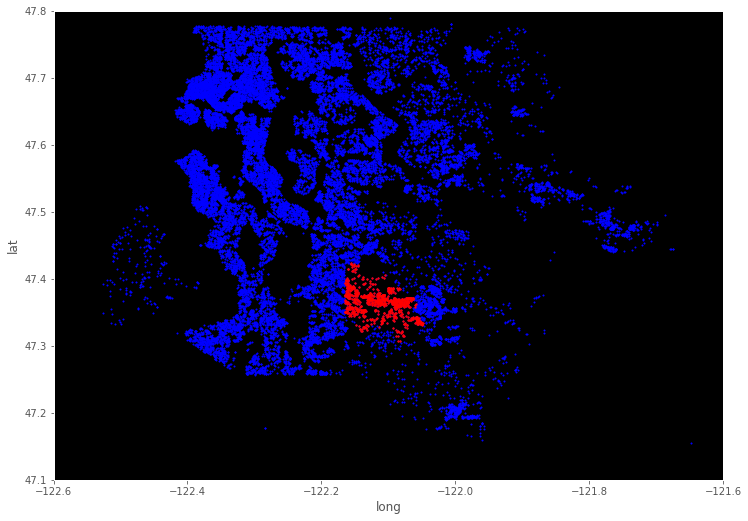

In [318]:
fig, ax = plt.subplots(figsize = (12,9))
df.plot.scatter(x = 'long', y = 'lat', ax = ax, color = (0.0,0.0,1.0,1.0), s = 2)
df[df['zip'] == 98042].plot.scatter(x = 'long', y = 'lat', ax = ax, color = (1.0,0.0,0.0,1.0), s = 3)
ax.set_xbound([-122.6,-121.6])
ax.set_ybound([47.1,47.8])
ax.set_facecolor((0.0, 0.0, 0.0))
plt.gca().set_aspect('equal')
plt.grid(False)

Below, I assign each zip code to a unique integer ID. All of the records with incorrect geographic information will be assigned the same ID. By plotting the points on the map, I found that any zip code with fewer than 20 records is an incorrect zip code. There are also some incorrect ZIP codes with more than 20 records, but those are easy to find because they have the wrong state (not Washington)

It is easiest to have the records with incorrect zip codes assigned to 0. I will then ignore these ZIP codes when creating the final dataset for the model.

In [322]:
# Convert each zip code to an integer ID
zip_ids = {}
n = 1
for zip_code, count in zip(df['zip'].value_counts().index,df['zip'].value_counts()):
    if count < 20:
        zip_ids[zip_code] = 0
    else:
        zip_ids[zip_code] = n
        n += 1
        
df['zip_id'] = df['zip'].replace(zip_ids)

#The lines below were used before I decided to remove data with incorrect geographic information
"""
# Shift the zip_id by one
df['zip_id'] = df['zip_id'] - 1
# Put incorrect records at the end
df['zip_id'] = df['zip_id'].apply(lambda x: df['zip_id'].max() + 1 if x == -1 else x)
"""

"\n# Shift the zip_id by one\ndf['zip_id'] = df['zip_id'] - 1\n# Put incorrect records at the end\ndf['zip_id'] = df['zip_id'].apply(lambda x: df['zip_id'].max() + 1 if x == -1 else x)\n"

Below, I remove any data that includes incorrect geographic information.

In [325]:
# Leave out incorrect geographic information
df = df[(df['state'] == 'Washington') & (df['zip_id'] != 0)]
len(df)

29186

The dataset still includes 29,186 records

In [329]:
# Look at repeat addresses still in the data
df['address'].value_counts()

Delridge Way Southwest, Seattle, Washington 98106, United States          24
Northeast 201st Street, Woodinville, Washington 98072, United States      11
Interlake Avenue North, Seattle, Washington 98103, United States          11
26th Avenue, Seattle, Washington 98122, United States                      9
12006 31st Ave NE, Seattle, Washington 98125, United States                7
                                                                          ..
12512 Southeast 17th Street, Bellevue, Washington 98005, United States     1
1393 Northeast Hickory Lane, Issaquah, Washington 98029, United States     1
2552 Northeast 83rd Street, Seattle, Washington 98115, United States       1
14309 Southeast 38th Street, Bellevue, Washington 98006, United States     1
13321 Southeast 148th Street, Renton, Washington 98058, United States      1
Name: address, Length: 29026, dtype: int64

There are still address repeated in the data. After taking a look at these, it appears that there are two reasons for these repeats:
1. They correspond to different homes on the same street. Many of the repeated addresses do not have a street number, hence why they aren't unique.
2. They correspond to buildings with different units (like a townhouse or condominium). If the unit number was provided, they would be unique.

I do not see a compelling reason to remove any of these.

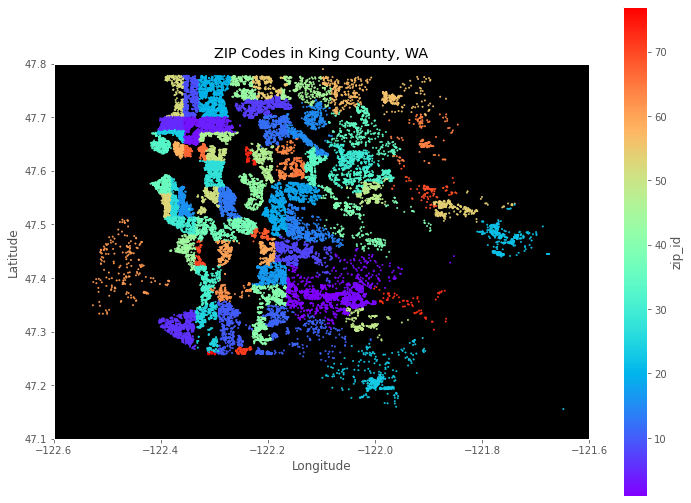

In [330]:
# Look at locations of the homes in the data
# Colored by zip code ID
fig, ax = plt.subplots(figsize = (12,9))
df.plot.scatter(x = 'long', y = 'lat', ax = ax, c = 'zip_id', cmap = 'rainbow', alpha = 1, s = 2)
ax.set_xbound([-122.6,-121.6])
ax.set_ybound([47.1,47.8])
ax.set_facecolor((0.0, 0.0, 0.0))
ax.set_title('ZIP Codes in King County, WA')
ax.set_xlabel('Longitude', fontsize = 12)
ax.set_ylabel('Latitude', fontsize = 12)
plt.gca().set_aspect('equal')
plt.grid(False)

Text(0, 0.5, 'ZIP ID')

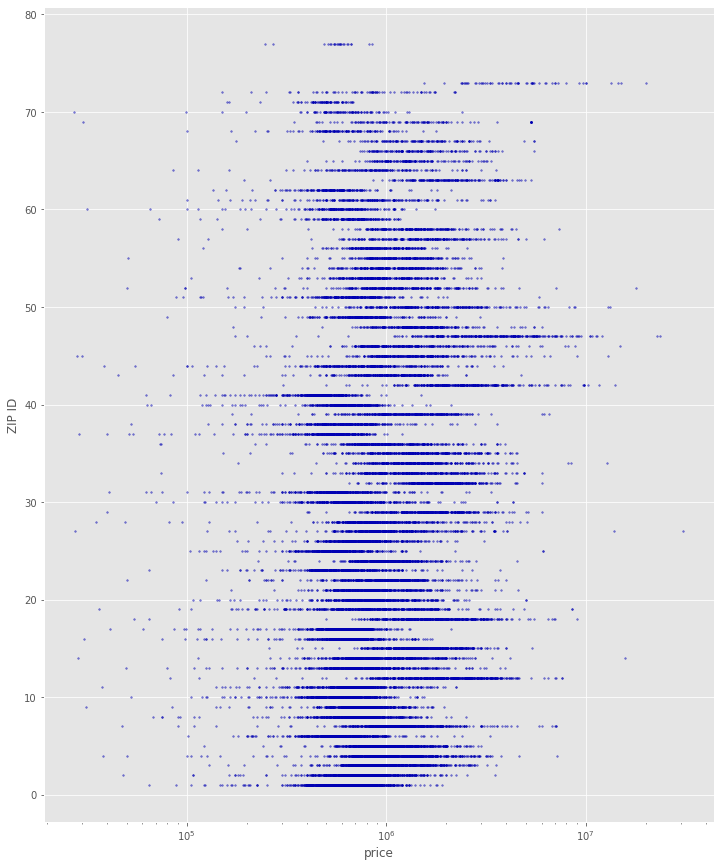

In [331]:
# Plot of price in each zip code
fig, ax = plt.subplots( figsize = (12,15) )

ax.scatter(df['price'],df['zip_id'], s = 3, color = (0.0,0.0,0.7,0.5))
ax.set_xscale('log')
ax.set_xlabel('price')
ax.set_ylabel('ZIP ID')

It does look like some zip codes have significantly different price ranges than other zip codes

### Preparing Data for Model

Below, I place each feature (other than the target variable, price) into one of three categories:<br>
Continuous numeric, discrete numeric, string categorical

In [332]:
cont_num = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_garage','sqft_patio']

disc_num = ['bedrooms','bathrooms','floors','yr_built','yr_renovated','grade']

str_cat = ['waterfront','greenbelt','nuisance','view','condition','heat_source','sewer_system','zip_id']

I put grade in discrete numerical group. I want the values to actual be numbers. I do that below.

In [333]:
# Change grades from strings to integers
df['grade'] = df['grade'].replace({'1 Cabin': 1,'2 Substandard': 2,'3 Poor': 3, '4 Low': 4, '5 Fair': 5,\
                                   '6 Low Average': 6, '7 Average': 7, '8 Good': 8, '9 Better': 9, '10 Very Good': 10,\
                                   '11 Excellent': 11, '12 Luxury': 12, '13 Mansion': 13})
df['grade'].value_counts()

<ipython-input-333-e635de71cd00>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['grade'] = df['grade'].replace({'1 Cabin': 1,'2 Substandard': 2,'3 Poor': 3, '4 Low': 4, '5 Fair': 5,\


7     11548
8      8860
9      3588
6      2837
10     1349
11      402
5       390
12      122
4        49
13       24
3        13
2         2
1         2
Name: grade, dtype: int64

In [334]:
# Look at statistical summary of numerical columns
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,sqft_basement,sqft_garage,sqft_patio,yr_built,yr_renovated,lat,long,zip,zip_id
count,2.918600e+04,2.918600e+04,29186.000000,29186.000000,29186.000000,2.918600e+04,29186.000000,29186.000000,29186.000000,29186.000000,29186.000000,29186.000000,29186.000000,29186.000000,29186.000000,29186.000000,29186.000000,29186.000000
mean,4.536334e+09,1.113084e+06,3.436065,2.332728,2131.210957,1.715816e+04,1.516515,7.637532,1826.224663,480.976838,336.606352,216.231241,1973.857809,93.463407,47.542930,-122.214998,98077.295313,26.942712
std,2.881814e+09,8.956271e+05,0.978179,0.895497,977.078832,6.103528e+04,0.548349,1.156052,880.758023,586.038548,286.174025,246.446628,31.663703,421.975711,0.146112,0.141405,54.410249,19.105319
min,1.000055e+06,2.736000e+04,0.000000,0.000000,3.000000,4.020000e+02,1.000000,1.000000,2.000000,0.000000,0.000000,0.000000,1900.000000,0.000000,47.155265,-122.526650,98001.000000,1.000000
25%,2.087000e+09,6.450000e+05,3.000000,2.000000,1440.000000,5.000000e+03,1.000000,7.000000,1190.000000,0.000000,0.000000,40.000000,1952.000000,0.000000,47.429654,-122.328439,98032.000000,10.000000
50%,3.874010e+09,8.680000e+05,3.000000,2.500000,1940.000000,7.560000e+03,1.500000,7.000000,1580.000000,0.000000,400.000000,140.000000,1976.000000,0.000000,47.557398,-122.234540,98059.000000,24.000000
75%,7.286500e+09,1.310000e+06,4.000000,3.000000,2640.000000,1.077525e+04,2.000000,8.000000,2290.000000,960.000000,520.000000,310.000000,2001.000000,0.000000,47.671710,-122.128046,98117.000000,42.000000
max,9.904000e+09,3.075000e+07,13.000000,10.500000,15360.000000,3.253932e+06,4.000000,13.000000,12660.000000,8020.000000,3580.000000,4370.000000,2022.000000,2022.000000,47.789830,-121.417590,98354.000000,77.000000


Some of the data have mean values significantly larger than the median values. This is an indication that their distributions are skewed with a tail of large values.
The columns with larger means than medians are
price, sqft_living, sqft_lot, sqft_above.

For sqft_basement, sqft_garage, and sqft_patio, the minimum values are 0. For records with zeros, that indicates that it doesn't have a basement, garage, or patio. It might make sense to create a categorical variable for whether a home has these features.

The median of yr_renovated is zero. This means more than half of the houses in the dataset have never been renovated.

In [335]:
# Look at houses with smallest garages
df[df['sqft_garage'] > 0].sort_values(by = 'sqft_garage')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,state,zip,zip_id
14977,1549500215,2021-12-17,1803000.0,4,4.0,3,326701,2.0,NO,NO,...,1,0,2021,0,"31072 Northeast 165th Street, Duvall, Washingt...",47.74529,-121.923620,Washington,98019,56
12936,7175300065,2021-07-07,560000.0,3,1.0,1270,6000,1.5,NO,NO,...,40,50,1926,0,"2105 Northeast 73rd Street, Seattle, Washingto...",47.68108,-122.304820,Washington,98115,4
22305,1138000090,2021-12-30,885000.0,3,2.0,1180,7201,1.0,NO,NO,...,70,90,1970,0,"12506 98th Avenue Northeast, Kirkland, Washing...",47.71301,-122.210780,Washington,98034,7
23451,7305300470,2022-05-20,1112200.0,4,3.0,1990,8409,1.0,NO,NO,...,70,240,1948,0,"17053 3rd Avenue Northeast, Shoreline, Washing...",47.75378,-122.327010,Washington,98155,20
1879,3387800200,2022-05-23,510000.0,3,1.0,1290,9052,1.0,NO,NO,...,80,160,1959,0,"22928 105th Avenue Southeast, Kent, Washington...",47.39593,-122.201130,Washington,98031,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7468,2746000022,2021-07-20,890000.0,4,3.0,2510,49658,1.0,NO,NO,...,2570,140,1977,0,"20626 229th Avenue Southeast, Maple Valley, Wa...",47.41679,-122.035350,Washington,98038,2
3158,1196001840,2021-12-08,328000.0,4,3.0,2740,23800,1.0,NO,NO,...,2840,310,1969,0,"29308 7th Avenue Southwest, Federal Way, Washi...",47.33937,-122.343630,Washington,98023,6
2984,1824059176,2021-12-17,4700000.0,5,6.0,6620,30056,2.0,NO,NO,...,3050,1730,2006,0,"4656 East Mercer Way, Mercer Island, Washingto...",47.56167,-122.211280,Washington,98040,42
18100,3304700355,2021-12-12,17800000.0,5,7.0,12470,92345,2.0,NO,NO,...,3390,520,1997,0,"69 Olympic Drive, Shoreline, Washington 98177,...",47.74115,-122.374255,Washington,98177,52


There is one record that claims to have the following:<br>

3 square feet of living space<br>

2 square feet of above grade space<br>

1 square foot basement and 1 square foot garage<br>

This could be a mistake and they thought they were listing rooms or someone is being cheeky. Either way, this record is not representative of a real home, so I will remove it.

In [336]:
# Remove the record with unrealistic data
df.drop(index = 14977, inplace = True)
df[df['sqft_garage'] > 0].sort_values(by = 'sqft_garage')

C:\Users\david\anaconda3\envs\learn-env\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,state,zip,zip_id
12936,7175300065,2021-07-07,560000.0,3,1.0,1270,6000,1.5,NO,NO,...,40,50,1926,0,"2105 Northeast 73rd Street, Seattle, Washingto...",47.68108,-122.304820,Washington,98115,4
23451,7305300470,2022-05-20,1112200.0,4,3.0,1990,8409,1.0,NO,NO,...,70,240,1948,0,"17053 3rd Avenue Northeast, Shoreline, Washing...",47.75378,-122.327010,Washington,98155,20
22305,1138000090,2021-12-30,885000.0,3,2.0,1180,7201,1.0,NO,NO,...,70,90,1970,0,"12506 98th Avenue Northeast, Kirkland, Washing...",47.71301,-122.210780,Washington,98034,7
18142,6145601500,2021-11-22,760000.0,3,1.0,1450,3936,1.0,NO,NO,...,80,80,1921,0,"726 North 102nd Street, Seattle, Washington 98...",47.70310,-122.348700,Washington,98133,9
16746,5379802853,2021-09-02,525000.0,3,2.0,1480,16875,1.0,NO,NO,...,80,0,1964,0,"16425 48th Avenue South, SeaTac, Washington 98...",47.45551,-122.273530,Washington,98188,60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7468,2746000022,2021-07-20,890000.0,4,3.0,2510,49658,1.0,NO,NO,...,2570,140,1977,0,"20626 229th Avenue Southeast, Maple Valley, Wa...",47.41679,-122.035350,Washington,98038,2
3158,1196001840,2021-12-08,328000.0,4,3.0,2740,23800,1.0,NO,NO,...,2840,310,1969,0,"29308 7th Avenue Southwest, Federal Way, Washi...",47.33937,-122.343630,Washington,98023,6
2984,1824059176,2021-12-17,4700000.0,5,6.0,6620,30056,2.0,NO,NO,...,3050,1730,2006,0,"4656 East Mercer Way, Mercer Island, Washingto...",47.56167,-122.211280,Washington,98040,42
18100,3304700355,2021-12-12,17800000.0,5,7.0,12470,92345,2.0,NO,NO,...,3390,520,1997,0,"69 Olympic Drive, Shoreline, Washington 98177,...",47.74115,-122.374255,Washington,98177,52


In [349]:
np.linspace(0,10**7,40)

array([       0.        ,   256410.25641026,   512820.51282051,
         769230.76923077,  1025641.02564103,  1282051.28205128,
        1538461.53846154,  1794871.79487179,  2051282.05128205,
        2307692.30769231,  2564102.56410256,  2820512.82051282,
        3076923.07692308,  3333333.33333333,  3589743.58974359,
        3846153.84615385,  4102564.1025641 ,  4358974.35897436,
        4615384.61538462,  4871794.87179487,  5128205.12820513,
        5384615.38461538,  5641025.64102564,  5897435.8974359 ,
        6153846.15384615,  6410256.41025641,  6666666.66666667,
        6923076.92307692,  7179487.17948718,  7435897.43589744,
        7692307.69230769,  7948717.94871795,  8205128.20512821,
        8461538.46153846,  8717948.71794872,  8974358.97435897,
        9230769.23076923,  9487179.48717949,  9743589.74358974,
       10000000.        ])

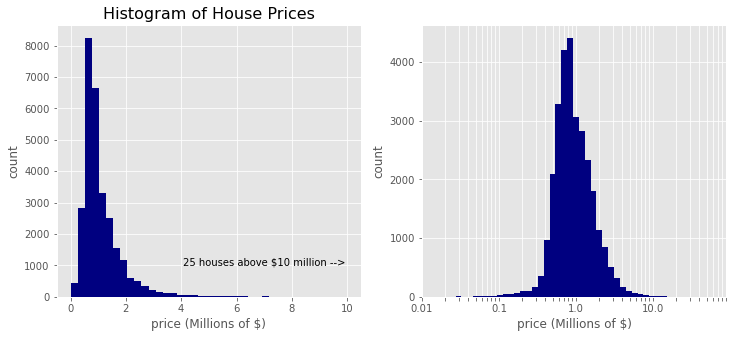

In [355]:
# Histogram of price (log-scale on the right)
fig, ax = plt.subplots(ncols = 2, figsize = (12, 5))

ax[0].hist(df['price']/1000000, bins = np.linspace(0,10,40), color = (0.0,0.0,0.5,1.0))
ax[0].set_ylabel('count')
ax[0].set_xlabel('price (Millions of $)')
ax[0].set_title('Histogram of House Prices',fontsize = 16)
ax[0].text(7, 1000, '25 houses above $10 million -->', horizontalalignment = 'center')

ax[1].hist(np.log(df['price']), bins = 40, color = (0.0,0.0,0.5,1.0))
ax[1].set_ylabel('count')
ax[1].set_xlabel('price (Millions of $)')
log_ticks = np.append(\
                      np.append(\
                                np.append(\
                                          np.linspace(10**4,9*10**4,9),\
                                          np.linspace(10**5,9*10**5,9)),\
                                np.linspace(10**6,9*10**6,9)),\
                      np.linspace(10**7,9*10**7,9)\
                     )
ax[1].set_xticks(np.log(log_ticks))
ax[1].set_xticklabels([x/10**6 if i%9 == 0 else '' for i,x in enumerate(log_ticks)]);

The histogram on the left is highly skewed. After taking a natural log of the prices, the histogram turns into the one on the right which is more symmetric and normal. There is a substantial tail to the left which is kind of surprising. The minimum prices are as low as 27,000, very low for a house. Looking up some of these properties manually on Zillow shows that the prices were not anywhere near that low in reality. I think these might be typos or possibly they were just the down payments on the homes. One example is record 7577 which claims to have a price of 28,307. However, on Zillow, the price was actually 1,500,000. Source: https://www.zillow.com/homedetails/15708-124th-Ave-NE-Woodinville-WA-98072/48747253_zpid/

I think this might just be the down payment on the sale for two reasons:
1. 28,307 is about 19% of 150,000. A typical down payment on a home should be about 20% of the price.
2. The sale date is listed as November 4, 2021 in this dataset, but Zillow says it was sold on December 6, 2021. I think this might mean the house was officially sold in December after a down payment was made in November.

This is not the only home like this. There are other examples of homes that sold for over 1 million, but this data set has the prices below 100,000.

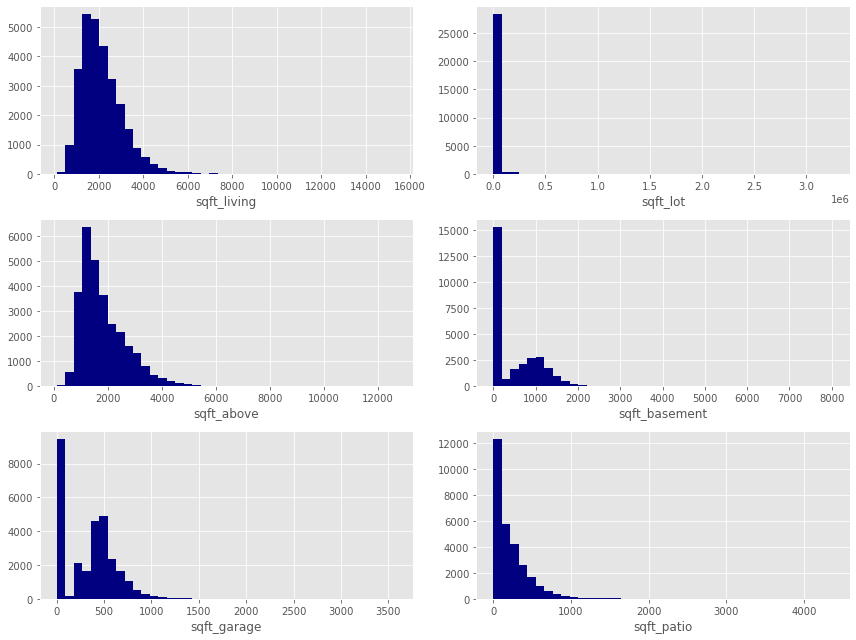

In [356]:
# Histograms of the continuous numerical data
fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize = (12,9) )
for n, feat in enumerate(cont_num):
    i = n // 2
    j = n % 2
    ax[i,j].hist(df[feat], bins = 40, color = (0.0,0.0,0.5,1.0))
    ax[i,j].set_xlabel(feat)
fig.tight_layout()

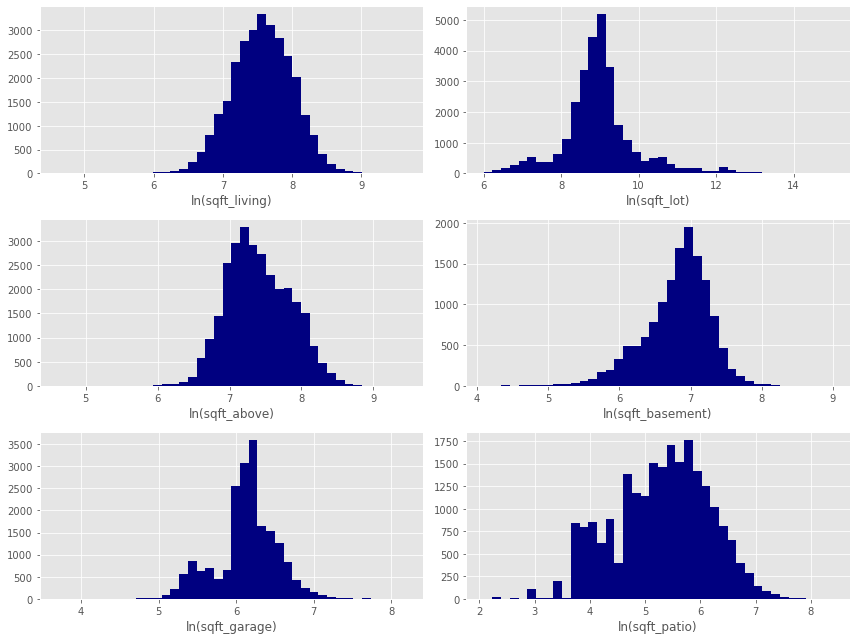

In [357]:
# Histograms of the continuous numerical data
fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize = (12,9) )
for n, feat in enumerate(cont_num):
    i = n // 2
    j = n % 2
    ax[i,j].hist(np.log(df[df[feat] != 0][feat]), bins = 40, color = (0.0,0.0,0.5,1.0))
    ax[i,j].set_xlabel(f"ln({feat})")
fig.tight_layout()

The distributions are look more symmetric now.
Most of the continuous numeric features have highly skewed distributions. It might make sense to take a log of these.

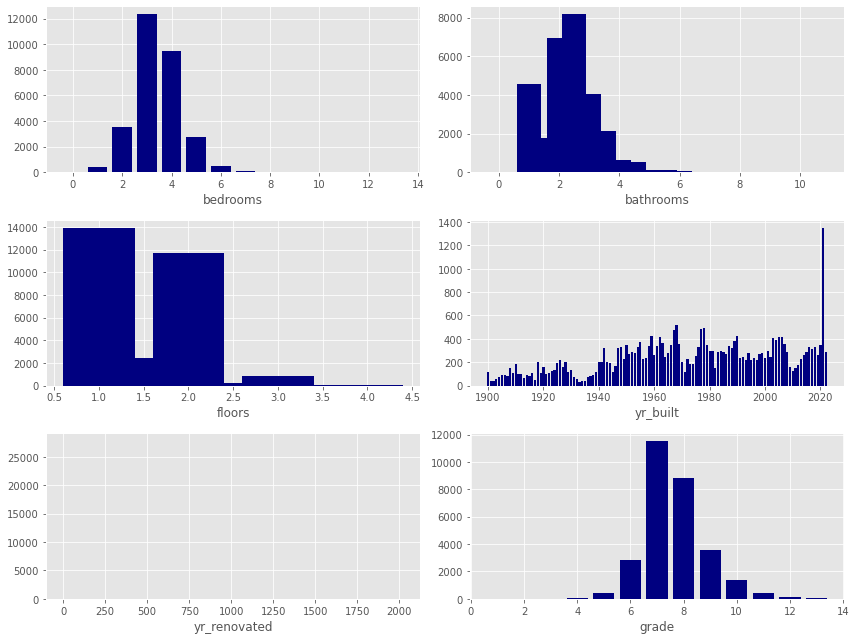

In [358]:
# Histograms of the discrete numerical data
fig, ax = plt.subplots(ncols = 2, nrows = 3, figsize = (12,9) )
for n, feat in enumerate(disc_num):
    i = n // 2
    j = n % 2
    x = df[feat].value_counts().index
    y = df[feat].value_counts()
    ax[i,j].bar(x,y, color = (0.0,0.0,0.5,1.0))
    ax[i,j].set_xlabel(feat)
fig.tight_layout()

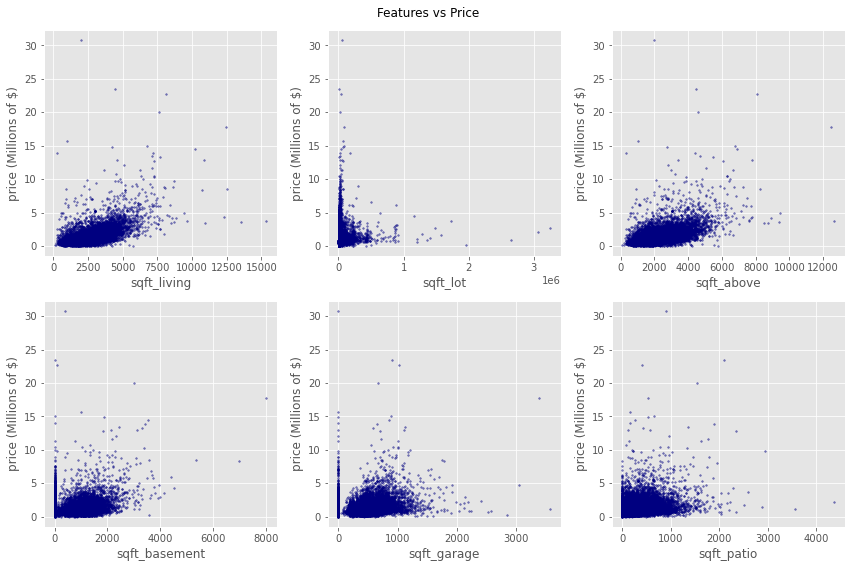

In [359]:
# Plots of continuous numeric features vs. price
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (12,8))

for n, feat in enumerate(cont_num):
    i = n // 3
    j = n % 3
    df_good = df[df[feat].isna() == False]
    ax[i,j].scatter(df_good[feat],df_good['price']/1000000, alpha=0.5, s=3, color = (0.0,0.0,0.5,0.5))
    ax[i,j].set_xlabel(feat)
    ax[i,j].set_ylabel('price (Millions of $)')
fig.suptitle('Features vs Price')
fig.tight_layout()

These plots really reinforce the need to take logs of some of these variables. For most of the scatterplots above, the data is concentrated in the bottom left corner.
The same plots, but with logs taken, are below.

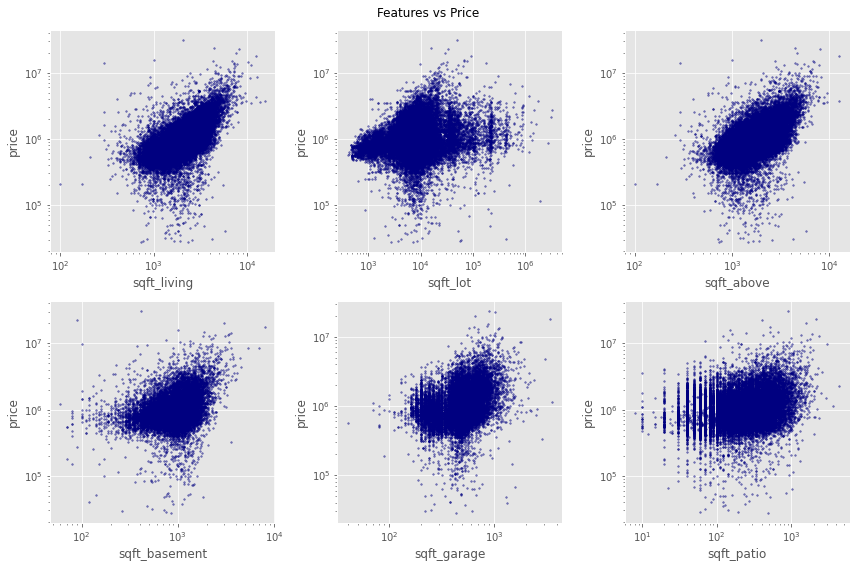

In [360]:
# Same as above, but now log-log plots
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (12,8))

for n, feat in enumerate(cont_num):
    i = n // 3
    j = n % 3
    df_good = df[(df[feat].isna() == False) & (df[feat] != 0)]
    ax[i,j].scatter(df_good[feat],df_good['price'], alpha=0.5, s = 3, color = (0.0,0.0,0.5,0.5))
    ax[i,j].set_yscale('log')
    ax[i,j].set_xscale('log')
    ax[i,j].set_xlabel(feat)
    ax[i,j].set_ylabel('price')
fig.suptitle('Features vs Price')
fig.tight_layout()

Notes about plots above:<br>
It seems appropriate to take logs of most of these variables since their distributions are pretty skewed before taking logs. After taking logs, the scatterplots have a much more normal distributions and linear trends are easier to see.<br>
It is not appropriate to take logs of latitude and longitude. This is fine because that is not how I plan to use those anyway. <br>

Visible trends:<br>
sqft_living and sqft_above both show a positive trend with price.<br>
sqft_basement, sqft_garage, and sqft_patio show weaker positive trends with price.<br>

For some of these features, there are zeros that effectively become negative infinity after taking a log. A way around this is to create categorical variables that indicate whether the feature is 0 or not. For example, sqft_garage is 0 if a home does not have a garage. I would create a categorical variable called has_garage which would either be 0 or 1. In the model, I would use has_garage x ln(garage) instead of just using ln(garage). I think it would also make sense to use has_garage by itself in addition to this interaction term.<br>

I also like the idea of shifting each so the median is at 0. This will make the constant easier to interpet.

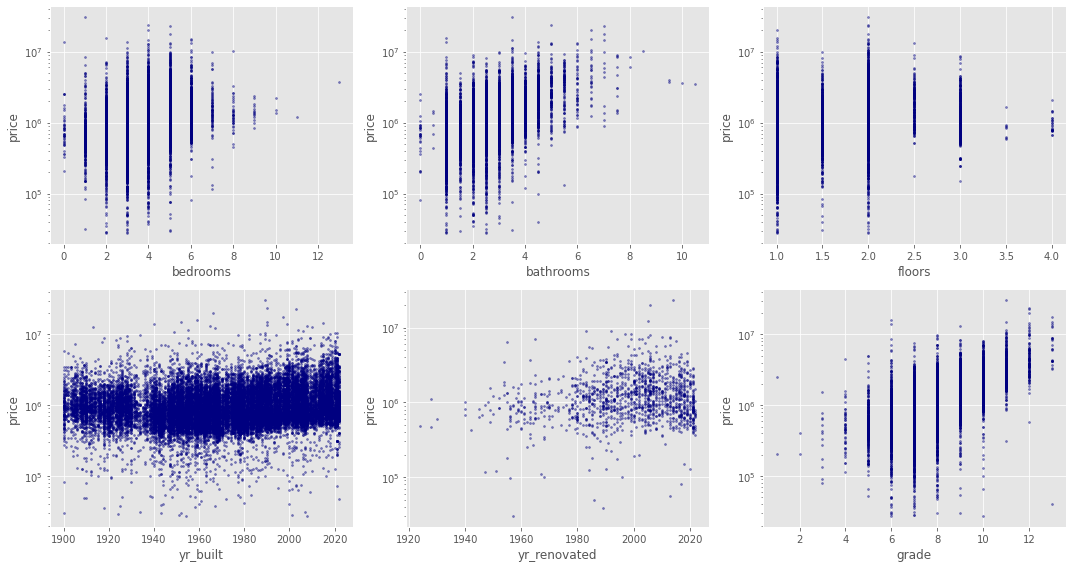

In [361]:
# Plots of discrete numeric features with price on log scale
fig, ax = plt.subplots(ncols = 3, nrows = 2, figsize = (15,8))

for n, feat in enumerate(disc_num):
    i = n // 3
    j = n % 3
    if feat == 'yr_renovated':
        df_good = df[(df[feat].isna() == False) & (df[feat] != 0)]
    else:
        df_good = df[df[feat].isna() == False]
    ax[i,j].scatter(df_good[feat],df_good['price'], alpha=0.5, s=4, color = (0.0,0.0,0.5,0.5))
    ax[i,j].set_yscale('log')
    ax[i,j].set_xlabel(feat)
    ax[i,j].set_ylabel('price')
fig.tight_layout()

The discrete numeric features are fine as is. It would not make much sense to take logs of these.<br>

Visible trends:<br>
The strongest trend is grade vs. price. Higher grades tend to go with higher prices.<br>
It also looks like more bathrooms tends to lead to higher prices.<br>
There might be a slight upward trend in price for more recently built houses.

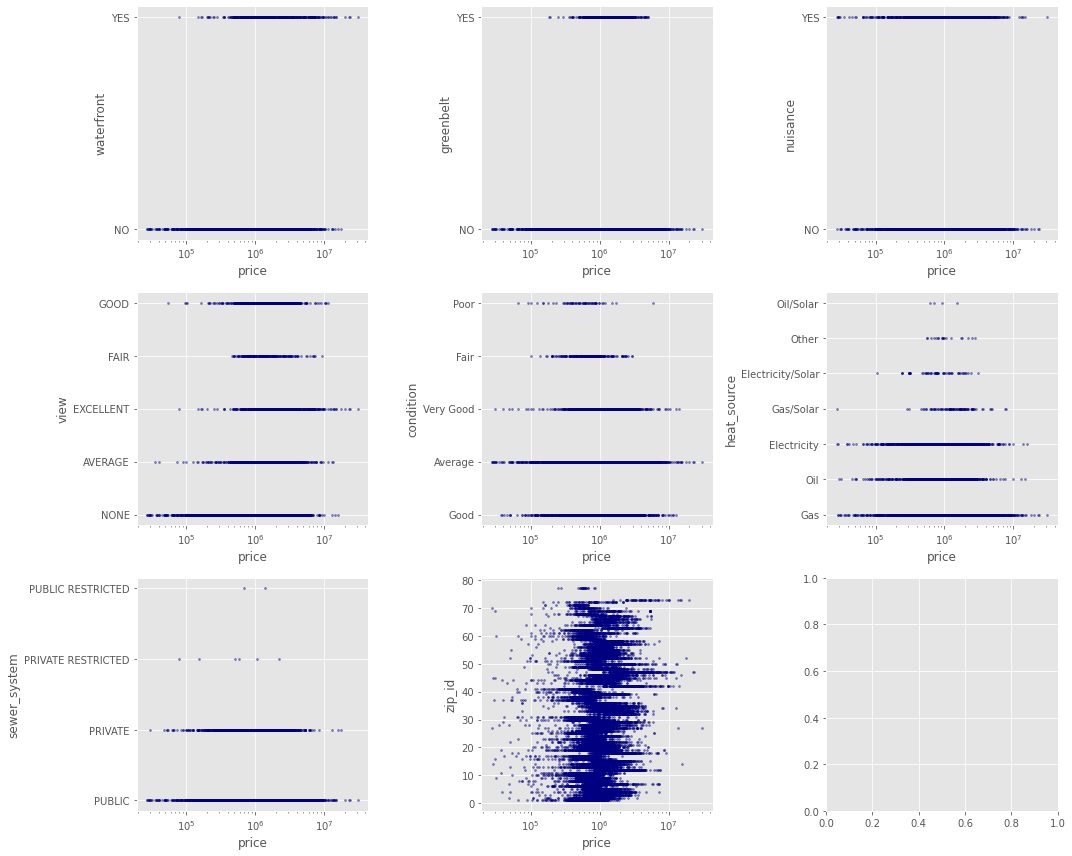

In [362]:
# Scatterplots of categorical features vs price in log scale
fig, ax = plt.subplots(ncols = 3, nrows = 3, figsize = (15,12))

for n, feat in enumerate(str_cat):
    i = n // 3
    j = n % 3
    df_good = df[df[feat].isna() == False]
    ax[i,j].scatter(df_good['price'], df_good[feat], s=4, color = (0.0,0.0,0.5,0.5))
    ax[i,j].set_xscale('log')
    ax[i,j].set_ylabel(feat)
    ax[i,j].set_xlabel('price')
fig.tight_layout()

Visible trends:<br>

It appears that having waterfront property tends to correlate with higher prices.<br>
There may be a trend with price vs. view, but it is not as obvious.

### Linear Models with Logarithmic Data
I am going to use a linear regression model to relate the features of the houses to their prices.<br>

A linear model means that some target variable (price) is equal to a linear combination of many independent variables.<br>

$$
\begin{align}
\hat{y} &= C + B_1 \cdot x_1 + B_2 \cdot x_2 + B_3 \cdot x_3 ...
\end{align}
$$

I could hypothetically use price as my target variable, but its distribution is highly skewed (lots of low values, only a few high values). The linear regression model does not fit data like this very well because it is assuming the data is more or less normally distributed. I fixed this by instead using ln(price/median(price)) as my target variable. I also took the ln of some of the independent variables because their distributions were also heavily skewed. At the end of the day, my model will look more like this:


$$
\begin{align}
ln \left( \frac{\hat{y}}{y_{med}} \right) &= C + B_1 \cdot x_1 + B_2 \cdot (x_2-x_{2,med}) + B_3 \cdot ln \left( \frac{x_3}{x_{3,med}} \right)
\end{align}
$$

When I feed the data to statsmodels to do the linear regression, it doesn't know that some of the data has been passed through a natural log or shifted by the median (or both). It just knows it has data and it will create a matrix to solve for the parameter values. It is up to me to turn the model back into something useful (it probably wouldn't work out if I told my stakeholder's all my recommendations in terms of ln(price)). If I take e to the power of each side of the equation, I get this:

$$
\begin{align}
\frac{\hat{y}}{y_{med}} &= e^C \cdot \left(e^{B_1}\right)^{x_1} \cdot \left(e^{B_2}\right)^{x_2-x_{2,med}} \cdot \left(\frac{x_3}{x_{3,med}}\right)^{B_3}
\end{align}
$$

Now the model is not a sum of different contributions, but a product. While the model did not contain any interaction terms, the terms all behave in a similar way to interaction terms. The larger all the terms contributions are, the bigger effect each other term has if it changes. This means that none of the parameters effects are truly independent in this model. For example, this model says that building a garage will not add a set dollar amount to the price. Instead, it will multiply the price it had before the garage was built by some amount. A house that was worth a lot will get a bigger price increase than one that is worth a little, even though they made the same change. Whether or not this is actually how it works in the real world, I don't know, but it could affect the success of the model I make.

It is possible to create a model with both additive and multiplicative terms instead of them all being multiplicative like the model here. However, this would not be a linear regression and a more advanced technique would be needed to fit the model.

The terms $e^C$ term represents the baseline multiplier. If we multiply the median price by this, we get the price of a home where $x_1 = 0$, $x_2 = x_{2,med}$, and $x_3 = x_{3,med}$.

The terms corresponding to $B_1$ and $B_2$ have similar interpretation. If $x_1$ increases by 1, then the predicted price is multiplied by $e^{B_1}$ (same with $x_2$ and $e^{B_2}$).

Since the linear regression model was fed the natural log of $x_3$, it changes how $B_3$ is interpreted compared to the other parameters. Instead of thinking about how much we add to $x_3$, we need to think by what do we multiply $x_3$. If $x_3$ is multiplied by $a$, then the predicted price is multiplied by $a^{B_3}$.

In the cell below, I make some adjustments to the data to make it better for performing linear regression.

1. Create categories to indicate whether the house has a basement, garage, or patio

2. Take ln of continuous numerical data (except lat and long) then shift so the median is at 0. This is the same as dividing all the data by the median, THEN taking the ln.

3. Shift the discrete numerical data so it has the median at zero.

In [363]:
to_ln = ['price','sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_garage','sqft_patio']
to_shift = ['bedrooms','bathrooms','floors','yr_built','grade']

df_adj = df.copy()

for feat in to_ln:
    # If 0, set ln(feature) to -10
    df_adj['ln_'+feat] = df[feat].apply(lambda x: -10 if x == 0 else np.log(x))
    feat_median = np.median(df_adj[df_adj['ln_'+feat] != -10]['ln_'+feat])
    print(f"Median of ln_{feat} is {feat_median}")
    df_adj['ln_'+feat] = df_adj['ln_'+feat].apply(lambda x: -10 if x == -10 else x - feat_median)
    df_adj.drop(columns = [feat], inplace=True)

for feat in to_shift:
    df_adj[feat] = df[feat] - np.median(df[feat])
    print(f"Median of {feat} is {np.median(df[feat])}")
    
feat_median = np.median(df[df['yr_renovated'] != 0]['yr_renovated'])
# Houses that haven't been renovated get -100 assigned
df_adj['yr_renovated'] = df['yr_renovated'].apply(lambda x: -100 if x == 0 else x - feat_median)
print(f"Median of yr_renovated is {np.median(df[df['yr_renovated'] != 0]['yr_renovated'])}")

df_adj

Median of ln_price is 13.673946993642486
Median of ln_sqft_living is 7.570443252057374
Median of ln_sqft_lot is 8.930626469173578
Median of ln_sqft_above is 7.365180126021013
Median of ln_sqft_basement is 6.887552571664617
Median of ln_sqft_garage is 6.173786103901937
Median of ln_sqft_patio is 5.3471075307174685
Median of bedrooms is 3.0
Median of bathrooms is 2.5
Median of floors is 1.5
Median of yr_built is 1976.0
Median of grade is 7.0
Median of yr_renovated is 2002.0


,id,date,bedrooms,bathrooms,floors,waterfront,greenbelt,nuisance,view,condition,...,state,zip,zip_id,ln_price,ln_sqft_living,ln_sqft_lot,ln_sqft_above,ln_sqft_basement,ln_sqft_garage,ln_sqft_patio
0,7399300360,2022-05-24,1.0,-1.5,-0.5,NO,NO,NO,NONE,Good,...,Washington,98055,59,-0.251479,-0.497174,-0.057158,-0.291910,-10.000000,-10.000000,-1.658228
1,8910500230,2021-12-13,2.0,0.0,-0.5,NO,NO,YES,AVERAGE,Average,...,Washington,98133,9,0.058182,0.356159,-0.120316,-0.006349,0.471278,-10.000000,0.133531
2,1180000275,2021-09-29,3.0,-0.5,-0.5,NO,NO,NO,AVERAGE,Average,...,Washington,98178,38,-1.026399,0.395102,-0.205444,0.000000,0.477628,-10.000000,-10.000000
3,1604601802,2021-12-14,0.0,0.5,0.5,NO,NO,NO,AVERAGE,Average,...,Washington,98118,13,-0.113329,0.107420,-1.686399,-0.371247,0.087861,-0.875469,0.251314
4,8562780790,2021-08-24,-1.0,-0.5,0.5,NO,NO,YES,NONE,Average,...,Washington,98027,39,-0.381841,-0.549359,-2.299943,-0.344096,-0.577634,0.136132,-1.945910
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30150,7834800180,2021-11-30,2.0,-0.5,0.0,NO,NO,NO,NONE,Good,...,Washington,98103,3,0.583039,-0.015585,-0.636577,0.012579,0.142420,-10.000000,0.000000
30151,194000695,2021-06-16,0.0,-0.5,0.5,NO,NO,NO,FAIR,Average,...,Washington,98116,36,0.413878,0.040410,-0.265013,0.245673,-10.000000,-10.000000,0.906721
30152,7960100080,2022-05-27,0.0,-0.5,-0.5,NO,NO,YES,NONE,Average,...,Washington,98122,27,-0.081580,-0.180262,-0.741937,-0.519300,-0.063179,-0.693147,-0.646627
30153,2781280080,2022-02-24,0.0,0.0,0.5,NO,NO,NO,NONE,Average,...,Washington,98055,59,-0.113329,0.281218,-0.961961,0.146891,-0.280902,0.000000,-0.741937


Below, I use the correlation coefficients of the data to see which pairs of features are highly colinear. I would not want to include two features in my model that are highly correlated.

In [364]:
# Correlation coefficients
df_adj.corr()

,id,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated,lat,long,zip,zip_id,ln_price,ln_sqft_living,ln_sqft_lot,ln_sqft_above,ln_sqft_basement,ln_sqft_garage,ln_sqft_patio
id,1.000000,-0.005132,-0.011802,0.034913,0.003357,0.022604,-0.028852,-0.000386,0.008604,-0.003302,0.001484,-0.022020,-0.013912,-0.168031,-0.010699,0.003329,0.030892,-0.006242
bedrooms,-0.005132,1.000000,0.594506,0.196438,0.390804,0.183311,0.015476,-0.017786,0.137690,-0.159394,0.028806,0.345827,0.678669,0.157808,0.577865,0.104196,0.243693,0.196271
bathrooms,-0.011802,0.594506,1.000000,0.428055,0.653244,0.455973,0.050879,0.047748,0.183340,-0.175896,0.059083,0.519643,0.775099,0.095564,0.677219,0.140970,0.362191,0.322247
floors,0.034913,0.196438,0.428055,1.000000,0.471861,0.521337,-0.015956,0.048355,0.089025,-0.033864,0.003264,0.256414,0.370362,-0.286061,0.525950,-0.203287,0.148715,0.203612
grade,0.003357,0.390804,0.653244,0.471861,1.000000,0.481290,-0.001556,0.132624,0.183695,-0.149544,0.087654,0.620478,0.725346,0.103149,0.710707,0.034925,0.380867,0.293574
yr_built,0.022604,0.183311,0.455973,0.521337,0.481290,1.000000,-0.223357,-0.152693,0.359332,-0.298547,-0.061679,0.130574,0.352809,-0.100794,0.445021,-0.277505,0.503528,0.197915
yr_renovated,-0.028852,0.015476,0.050879,-0.015956,-0.001556,-0.223357,1.000000,0.039612,-0.061024,0.054418,0.039704,0.082448,0.037422,0.031446,0.012243,0.057972,-0.113926,0.035155
lat,-0.000386,-0.017786,0.047748,0.048355,0.132624,-0.152693,0.039612,1.000000,-0.191535,0.302459,0.104398,0.426840,0.029246,-0.172425,-0.048537,0.232580,-0.127273,-0.011438
long,0.008604,0.137690,0.183340,0.089025,0.183695,0.359332,-0.061024,-0.191535,1.000000,-0.550053,0.065240,0.118957,0.255521,0.367991,0.361403,-0.311144,0.310716,0.135000
zip,-0.003302,-0.159394,-0.175896,-0.033864,-0.149544,-0.298547,0.054418,0.302459,-0.550053,1.000000,0.059550,-0.086304,-0.210305,-0.273297,-0.288677,0.248985,-0.317496,-0.111580


In [365]:
# Correlation between living space and basement space
np.corrcoef(df_adj[df_adj['ln_sqft_basement'] != -10]['ln_sqft_living'],\
            df_adj[df_adj['ln_sqft_basement'] != -10]['ln_sqft_basement'])

array([[1.        , 0.59684334],
       [0.59684334, 1.        ]])

The DataFrame of correlation coefficients underestimates some of the coefficients, particular for the ln_sqft_basement, ln_sqft_garage, and ln_sqft_patio features because it is counting the values even when it doesn't have that feature. If I remove those, like I have above, the correlation coefficient goes up significantly. This means that it might not make sense to include parameters for living area and basement/garage/patio area because they are fairly colinear.

Text(0.5, 1.0, 'Correlation Between Numeric Data')

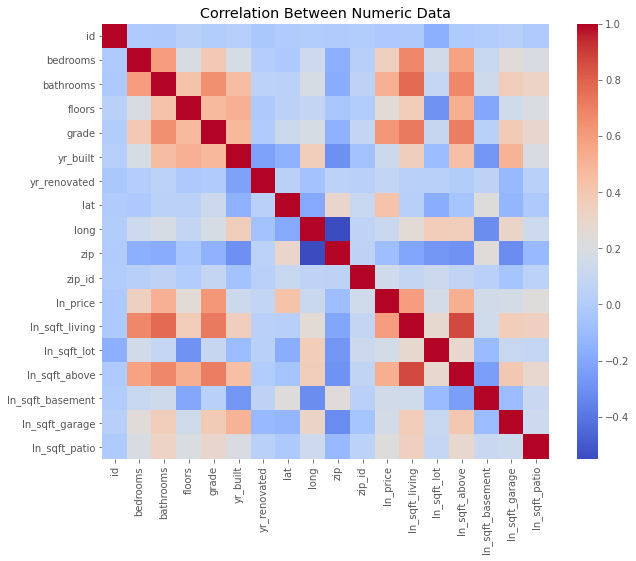

In [366]:
fig, ax = plt.subplots ( figsize = (10,8))
sns.heatmap(df_adj.corr(), ax = ax, cmap = 'coolwarm')
ax.set_title('Correlation Between Numeric Data')

In [367]:
# Find the largest correlation coefficients
df_corr = df_adj.corr().stack().reset_index().sort_values(0, ascending=False)
df_corr['pairs'] = list(zip(df_corr.level_0, df_corr.level_1))
df_corr.drop(columns = ['level_0','level_1'], inplace=True)
df_corr.set_index(['pairs'], inplace=True)
df_corr.rename(columns = {0:'corr'}, inplace=True)
df_corr

,corr
pairs,
"(id, id)",1.000000
"(zip, zip)",1.000000
"(floors, floors)",1.000000
"(grade, grade)",1.000000
"(yr_built, yr_built)",1.000000
...,...
"(ln_sqft_basement, long)",-0.311144
"(zip, ln_sqft_garage)",-0.317496
"(ln_sqft_garage, zip)",-0.317496


In [368]:
#Find pairs of features with strong correlation
df_corr[(df_corr['corr'] > 0.75) | (df_corr['corr'] < -0.75)]

,corr
pairs,
"(id, id)",1.000000
"(zip, zip)",1.000000
"(floors, floors)",1.000000
"(grade, grade)",1.000000
"(yr_built, yr_built)",1.000000
"(yr_renovated, yr_renovated)",1.000000
"(lat, lat)",1.000000
"(long, long)",1.000000
"(zip_id, zip_id)",1.000000


Strong correlations:<br>

ln_sqft_living and ln_sqft_above: 0.871877<br>

ln_sqft_living and bathrooms: 0.775099<br>

It would not make sense to include both ln_sqft_living and ln_sqft_above in the model since they are highly correlated and basically represent the same information.

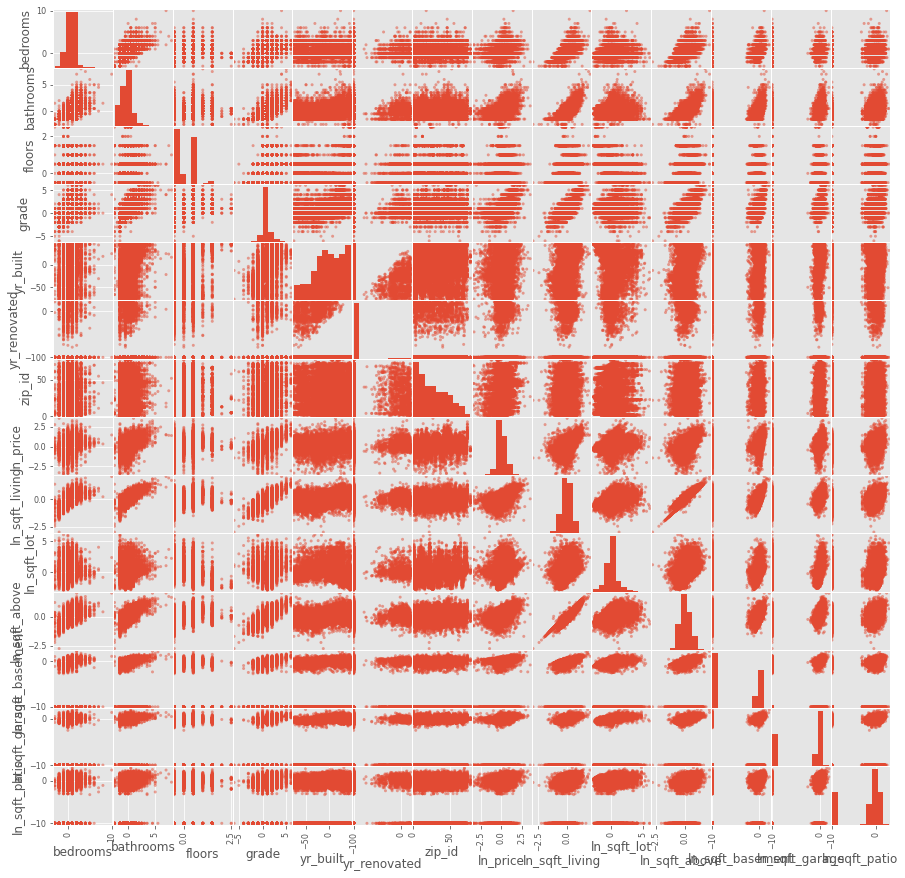

In [369]:
# Scatter matrix again, but this time with logs of continuous numeric values
for_scatter_matrix = ['bedrooms','bathrooms','floors','grade','yr_built','yr_renovated','zip_id','ln_price',\
                      'ln_sqft_living','ln_sqft_lot','ln_sqft_above','ln_sqft_basement','ln_sqft_garage',\
                      'ln_sqft_patio']
pd.plotting.scatter_matrix(df_adj[for_scatter_matrix], figsize = (15,15));

The scatter matrix above shows strong correlation between ln_sqft_living and ln_sqft_above. In fact, ln_sqft_living has linear trends with a few other features (bedrooms, bathrooms, grade, ln_sqft_basement, ln_sqft_garage).

## Iteratively making a model
I use the cell below to create a model. The cells below it are used to evaluate the model.

In [446]:
# Choose features to include
# 1 is included, 0 is excluded

features = [['ln_sqft_living','numerical',1], \
            ['ln_sqft_lot','numerical',0], \
            ['ln_sqft_basement','num-cat',0], \
            ['ln_sqft_garage','num-cat',0], \
            ['ln_sqft_patio','num-cat',0], \
            ['bedrooms','numerical',0], \
            ['bathrooms','numerical',0], \
            ['floors','numerical',0], \
            ['yr_built','numerical',0], \
            ['condition','categorical',1], \
            ['grade','numerical',1], \
            ['waterfront','YN',1], \
            ['greenbelt','YN',0], \
            ['nuisance','YN',0], \
            ['view','categorical',0], \
            ['zip_id','categorical',1], \
            ['yr_renovated','num-cat2',1]]

y = df_adj['ln_price']

in_fit = df_adj[['ln_price']]
for feat in features:
    if feat[2] == 1:
            
        if feat[1] == 'numerical': in_fit[feat[0]] = df_adj[feat[0]]
                
        if feat[1] == 'num-cat':
            in_fit['has_'+feat[0]] = df_adj[feat[0]].apply(lambda x: 0 if x == -10 else 1)
            in_fit[feat[0]] = df_adj[feat[0]] * in_fit['has_'+feat[0]]
            
        if feat[1] == 'num-cat2':
            in_fit['has_'+feat[0]] = df_adj[feat[0]].apply(lambda x: 0 if x == -100 else 1)
            #in_fit[feat[0]] = df_adj[feat[0]] * in_fit['has_'+feat[0]]
                
        if feat[1] == 'categorical':
            in_fit[feat[0]] = df_adj[feat[0]]
            in_fit = pd.get_dummies(in_fit, columns=[feat[0]], drop_first=True)
                
        if feat[1] == 'YN': in_fit['has_'+feat[0]] = df_adj[feat[0]].apply(lambda x: 1 if x == 'YES' else 0)

X = in_fit.drop(columns = 'ln_price')
results = sm.OLS(y,sm.add_constant(X)).fit()
results.summary()

<ipython-input-446-6d6fda21f6da>:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if feat[1] == 'numerical': in_fit[feat[0]] = df_adj[feat[0]]
<ipython-input-446-6d6fda21f6da>:39: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_fit[feat[0]] = df_adj[feat[0]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.686
Model:                            OLS   Adj. R-squared:                  0.685
Method:                 Least Squares   F-statistic:                     784.6
Date:                Tue, 20 Jun 2023   Prob (F-statistic):               0.00
Time:                        16:47:07   Log-Likelihood:                -8886.1
No. Observations:               29185   AIC:                         1.794e+04
Df Residuals:                   29103   BIC:                         1.862e+04
Df Model:                          81                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.4231      0.011    -39.525      0.000      -0.444      -0.402
ln_sqft_living          0.4429      0.007     66.906      0.000       0.430       0.456
condition_Fair         -0.0482      0.022     -2.174      0.030      -0.092      -0.005
condition_Good          0.0664      0.005     14.393      0.000       0.057       0.075
condition_Poor         -0.0605      0.041     -1.460      0.144      -0.142       0.021
condition_Very Good     0.1256      0.006     19.433      0.000       0.113       0.138
grade                   0.1154      0.003     43.362      0.000       0.110       0.121
has_waterfront          0.4794      0.015     31.817      0.000       0.450       0.509
zip_id_2                0.1443      0.015      9.415      0.000       0.114       0.174
zip_id_3                0.5787      0.016     36.334      0.000       0.548       0.610
zip_id_4                0.5918      0.016     37.290      0.000       0.561       0.623
zip_id_5                0.5824      0.016     36.489      0.000       0.551       0.614
zip_id_6               -0.0870      0.016     -5.347      0.000      -0.119      -0.055
zip_id_7                0.6062      0.016     37.233      0.000       0.574       0.638
zip_id_8                0.0915      0.016      5.601      0.000       0.060       0.124
zip_id_9                0.3275      0.017     19.809      0.000       0.295       0.360
zip_id_10              -0.0443      0.017     -2.633      0.008      -0.077      -0.011
zip_id_11              -0.0309      0.017     -1.824      0.068      -0.064       0.002
zip_id_12               0.9089      0.017     53.487      0.000       0.876       0.942
zip_id_13               0.3253      0.017     19.098      0.000       0.292       0.359
zip_id_14               0.3168      0.017     18.465      0.000       0.283       0.350
zip_id_15               0.7172      0.017     41.369      0.000       0.683       0.751
zip_id_16               0.1955      0.018     11.088      0.000       0.161       0.230
zip_id_17              -0.0182      0.018     -1.027      0.304      -0.053       0.016
zip_id_18               0.6988      0.018     39.071      0.000       0.664       0.734
zip_id_19               0.2930      0.018     16.457      0.000       0.258       0.328
zip_id_20               0.4024      0.018     22.524      0.000       0.367       0.437
zip_id_21               0.4317      0.018     23.734      0.000       0.396       0.467
zip_id_22               0.3171      0.018     17.204      0.000       0.281       0.353
zip_id_23               0.0095      0.019      0.513      0.608      -0.027       0.046
zip_id_24               0.5880      0.019     31.518      0.000       0.551       0.625
zip_id_25              -0.0829      0.019     -4.407      0.000      -0.120      -0.046
zip

The cell below turns all of the parameters into multipliers (the result of exponentiating both sides of the equation).

mult_10percent represents the amount by which the price is multiplied if the independent variable is multiplied by 1.1 (gets 10% larger). Only variables that were passed through a natural log before creating the model have this kind of multiplier.

mult_add1 represents the amount by which the price is multiplied if the independent variable is increased by 1. A variable only has this kind of multiplier if it was NOT passed through a natural log before fitting.

In [450]:
df_results = pd.DataFrame({'parameter': [par for par in results.params.index],\
                           'mult_10percent': [1.1**results.params[par] if par[0:3] == 'ln_' else 1 \
                                              for par in results.params.index],\
                           'mult_add1': [np.exp(results.params[par]) if par[0:3] != 'ln_' else 1 \
                                         for par in results.params.index],\
                           'CI95_10percent_low':[1.1**(results.params[par]-2*np.sqrt(results.cov_params()[par][par])) \
                                                 if par[0:3] == 'ln_' else 1 for par in results.params.index],\
                           'CI95_10percent_high':[1.1**(results.params[par]+2*np.sqrt(results.cov_params()[par][par])) \
                                                  if par[0:3] == 'ln_' else 1 for par in results.params.index],\
                           'CI95_add1_low':[np.exp(results.params[par]-2*np.sqrt(results.cov_params()[par][par])) \
                                            if par[0:3] != 'ln_' else 1 for par in results.params.index],\
                           'CI95_add1_high':[np.exp(results.params[par]+2*np.sqrt(results.cov_params()[par][par])) \
                                            if par[0:3] != 'ln_' else 1 for par in results.params.index],\
                           'p-value':[results.pvalues[par] for par in results.params.index]}
                          )
df_results.set_index('parameter', inplace=True)
df_results[0:10]

,mult_10percent,mult_add1,CI95_10percent_low,CI95_10percent_high,CI95_add1_low,CI95_add1_high,p-value
parameter,,,,,,,
const,1.000000,0.654999,1.000000,1.000000,0.641124,0.669174,0.000000e+00
ln_sqft_living,1.043119,1.000000,1.041804,1.044437,1.000000,1.000000,0.000000e+00
condition_Fair,1.000000,0.952979,1.000000,1.000000,0.911685,0.996143,2.967846e-02
condition_Good,1.000000,1.068652,1.000000,1.000000,1.058837,1.078558,8.303892e-47
condition_Poor,1.000000,0.941340,1.000000,1.000000,0.866526,1.022612,1.443078e-01
condition_Very Good,1.000000,1.133831,1.000000,1.000000,1.119268,1.148583,1.380565e-83
grade,1.000000,1.122272,1.000000,1.000000,1.116317,1.128259,0.000000e+00
has_waterfront,1.000000,1.615156,1.000000,1.000000,1.567207,1.664573,2.092740e-218
zip_id_2,1.000000,1.155256,1.000000,1.000000,1.120376,1.191222,5.066945e-21


In [448]:
# Get baseline price

base_price = np.exp( results.params['const'] + np.log(np.median(df['price'])) )
print(f"Baseline price = {round(base_price,2)}")
print()

Baseline price = 568539.04



<ipython-input-438-ac9d4fbcc347>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_zip.sort_values(by = 'mult_add1',inplace=True)


Text(0.5, 0, 'ZIP code ID')

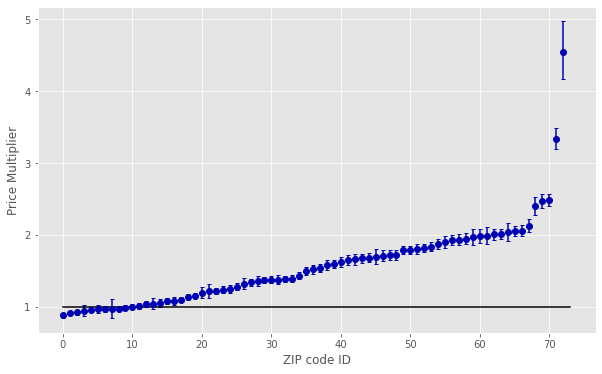

In [438]:
# Plot 95% confidence intervals for ZIP code parameters
fig, ax = plt.subplots( figsize = (10,6) )

df_zip = df_results[df_results.index.str.contains('zip')]
df_zip.sort_values(by = 'mult_add1',inplace=True)

yerrors = np.array([[m-el,eh-m] for m,el,eh in zip(df_zip['mult_add1'],\
                                          df_zip['CI95_add1_low'],\
                                          df_zip['CI95_add1_high'])])

ax.errorbar(x=np.arange(len(df_zip)),y=df_zip['mult_add1'],\
            yerr=yerrors.T, fmt='o', color = (0.0,0.0,0.7,1.0), capsize = 2)
ax.plot([0,len(df_zip)],[1,1], color = (0.0,0.0,0.0,1.0))
ax.set_ylabel('Price Multiplier')
ax.set_xlabel('ZIP code ID')

In [439]:
sum(df_zip['p-value']< 0.05/73)

60

In [440]:
sum(df_zip['CI95_add1_low'] > 1.1)

54

In [441]:
sum(df_zip['CI95_add1_high'] < 0.9)

0

In [374]:
# Convert the covariance matrix to a correlation matrix
corr_params = results.cov_params().copy()
for param in corr_params.index:
    corr_params[param] = corr_params[param] / np.sqrt(results.cov_params()[param][param])
    corr_params[corr_params.index == param] = corr_params[corr_params.index == param] /\
                                                np.sqrt(results.cov_params()[param][param])
corr_params

,const,ln_sqft_living,condition_Fair,condition_Good,condition_Poor,condition_Very Good,grade,has_waterfront,zip_id_2,zip_id_3,...,zip_id_66,zip_id_67,zip_id_68,zip_id_69,zip_id_70,zip_id_71,zip_id_72,zip_id_73,zip_id_77,has_yr_renovated
const,1.000000,0.082526,-0.037504,-0.176134,-0.021886,-0.119091,-0.151491,0.002973,-0.667570,-0.636287,...,-0.335450,-0.320881,-0.335198,-0.307765,-0.290151,-0.271677,-0.245858,-0.220297,-0.147570,-0.038584
ln_sqft_living,0.082526,1.000000,0.009978,-0.048187,-0.004889,-0.076915,-0.680558,0.005108,-0.014149,0.098877,...,0.039965,0.035670,0.008533,-0.005560,0.001843,0.004685,-0.011284,0.004250,0.005915,-0.086176
condition_Fair,-0.037504,0.009978,1.000000,0.084234,0.019020,0.063382,0.074030,-0.043909,0.005566,-0.002024,...,-0.011754,-0.006291,0.010111,-0.004405,0.006557,0.009781,0.002902,-0.003615,-0.010730,0.021724
condition_Good,-0.176134,-0.048187,0.084234,1.000000,0.049572,0.266745,0.166878,-0.031215,0.025697,0.030089,...,-0.004500,-0.005426,0.010962,-0.012351,0.005555,0.026506,0.009071,-0.009589,0.006151,0.089527
condition_Poor,-0.021886,-0.004889,0.019020,0.049572,1.000000,0.038881,0.068492,-0.030416,-0.005448,-0.002676,...,-0.004036,-0.013426,0.006034,-0.000612,0.003410,0.005720,-0.028489,-0.004607,0.001190,0.014467
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
zip_id_71,-0.271677,0.004685,0.009781,0.026506,0.005720,0.022207,0.029058,0.000316,0.183724,0.178459,...,0.093495,0.089626,0.093548,0.085205,0.080513,1.000000,0.067634,0.060676,0.040931,-0.002589
zip_id_72,-0.245858,-0.011284,0.002902,0.009071,-0.028489,-0.009386,0.005351,-0.006647,0.171848,0.164137,...,0.089304,0.085486,0.084706,0.081116,0.073756,0.067634,1.000000,0.060083,0.037747,-0.008546
zip_id_73,-0.220297,0.004250,-0.003615,-0.009589,-0.004607,-0.009585,-0.055593,-0.031263,0.161778,0.154523,...,0.089084,0.083940,0.075956,0.078863,0.067627,0.060676,0.060083,1.000000,0.034933,-0.031162
zip_id_77,-0.147570,0.005915,-0.010730,0.006151,0.001190,-0.000958,0.000890,0.001364,0.102370,0.099491,...,0.053351,0.050884,0.051178,0.048011,0.044394,0.040931,0.037747,0.034933,1.000000,0.001580


### Evaluating a model
Each time I created a model, I would use the cells below to determine how good the model is.

I looked at the residuals of the model, both compared to each feature in the data, but also the distribution of residuals.

I also looked at partial regression plots and CCPR plots to tell if the fits were significant.

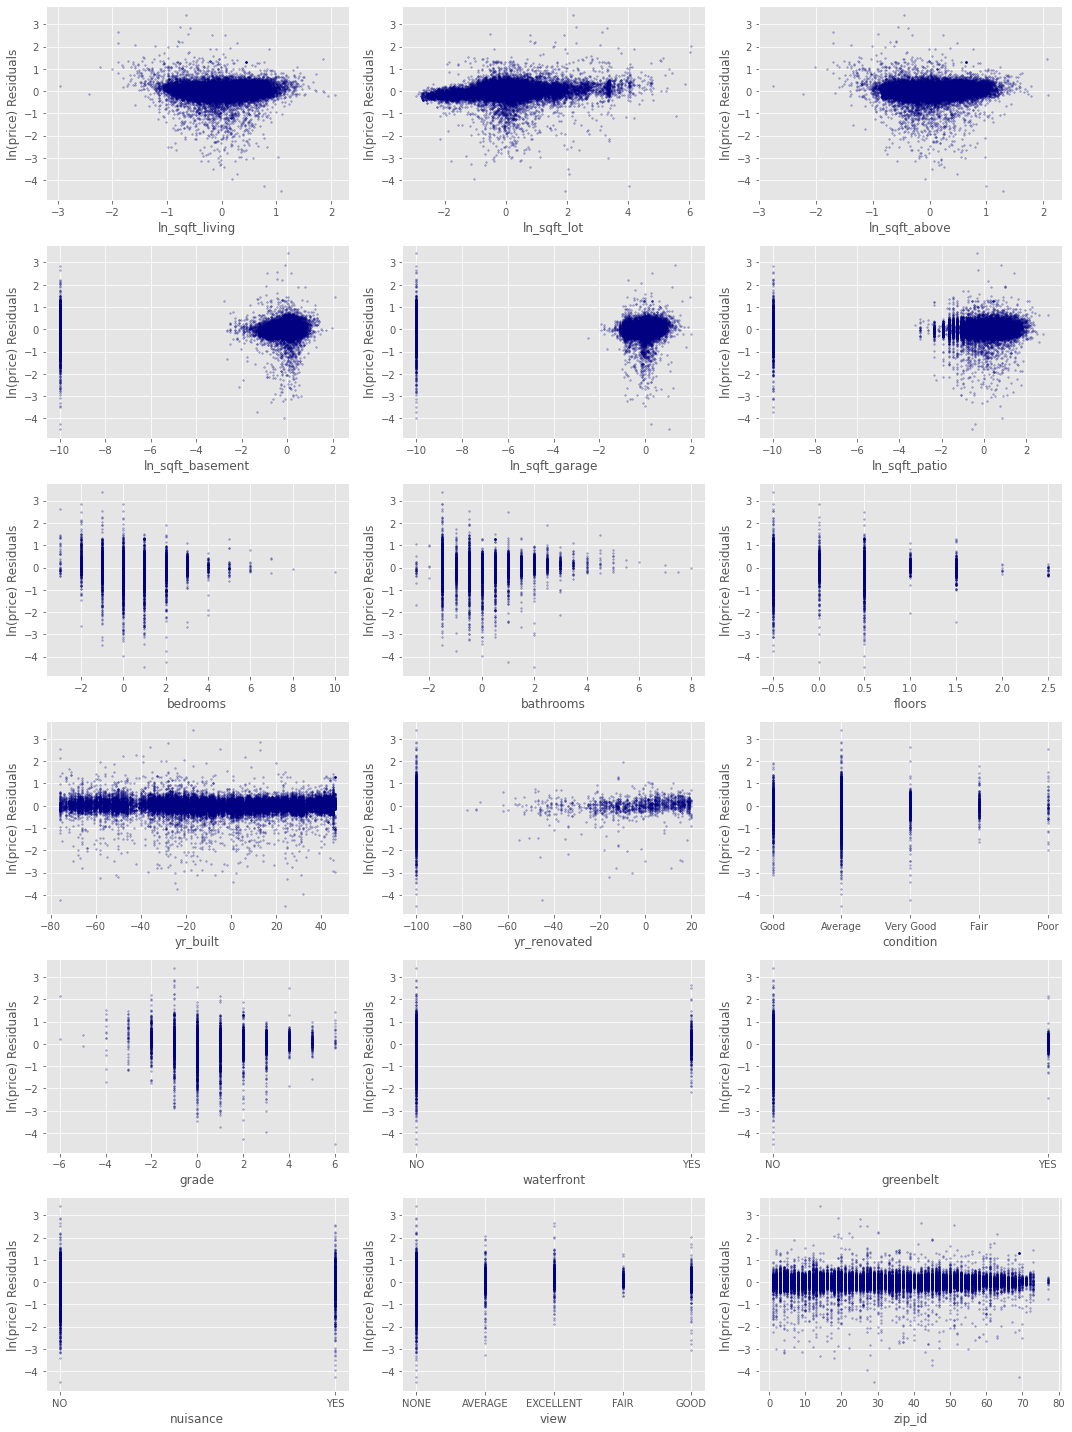

In [375]:
# Plot residuals against each numeric feature
fig, ax = plt.subplots(ncols = 3, nrows = 6, figsize = (15,20))

features = ['ln_sqft_living','ln_sqft_lot','ln_sqft_above','ln_sqft_basement','ln_sqft_garage','ln_sqft_patio',\
            'bedrooms','bathrooms','floors','yr_built','yr_renovated','condition','grade','waterfront','greenbelt',\
            'nuisance','view','zip_id']

for n, feat in enumerate(features):
    i = n // 3
    j = n % 3
    ax[i,j].scatter(df_adj[feat], results.resid, s=3, color = (0.0,0.0,0.5,0.3))
    ax[i,j].set_ylabel('ln(price) Residuals')
    ax[i,j].set_xlabel(feat)
fig.tight_layout()

Text(0, 0.5, 'count')

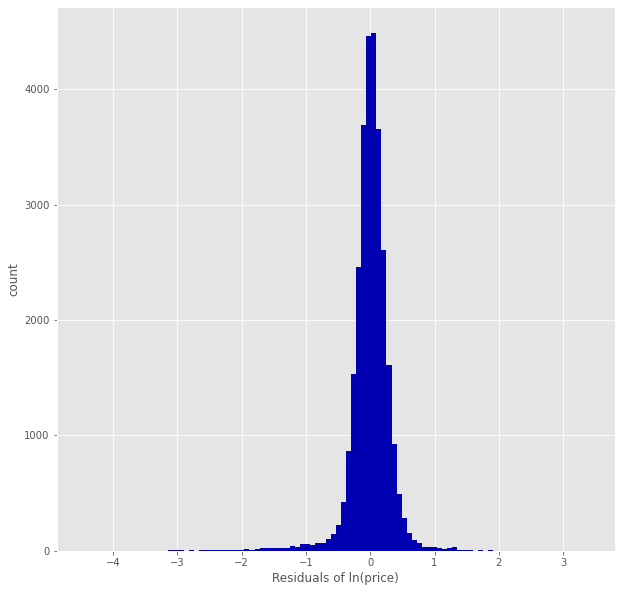

In [376]:
# Plot histogram of residuals
fig, ax = plt.subplots( figsize = (10,10) )

ax.hist(results.resid, bins = 100, color = (0.0,0.0,0.7,1.0))
ax.set_xlabel('Residuals of ln(price)')
ax.set_ylabel('count')

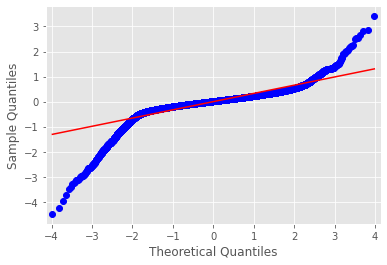

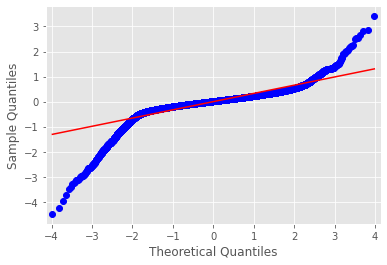

In [377]:
# Make Quantile-Quantile plot to compare to normal
sm.qqplot(results.resid,line='s')

The residuals match normal quantiles near the center, but the tails do not match.

In [378]:
stats.kurtosis(results.resid)

20.5189652658584

The histogram of the residuals are symmetric (no skew), and more centrally peaked than a normal distribution (kurtosis equals 20). This means the distribution is more concentrated near the center and less in the tails.

In [379]:
print(f"Standard Deviation of residuals: {np.std(results.resid, ddof=1)}")
print(f"95% confidence interval of Price Multiplier Not Explained by Model:[{round(np.exp(-2*np.std(results.resid, ddof=1)),3)}-{round(np.exp(2*np.std(results.resid, ddof=1)),3)}]")

Standard Deviation of residuals: 0.32809726922320304
95% confidence interval of Price Multiplier Not Explained by Model:[0.519-1.927]


The cell above shows that the variance not explained by the model still allows for predictions that are off by a factor of 2.
This means the actual price could be half of what is predicted or twice what is predicted.

In [380]:
np.exp(stats.mstats.mquantiles(results.resid, prob=[0.025,0.975]))

array([0.52389963, 1.67102685])

Since the distribution is more centrally concentrated than a normal distribution, the 95% confidence interval is not necessarily just -2std to 2std. Instead, I find the actually quantiles directly using scipy.stats. The result still shows that the price can be half of what is predicted, but the top end is around 1.68 times what is predicted (better than twice).

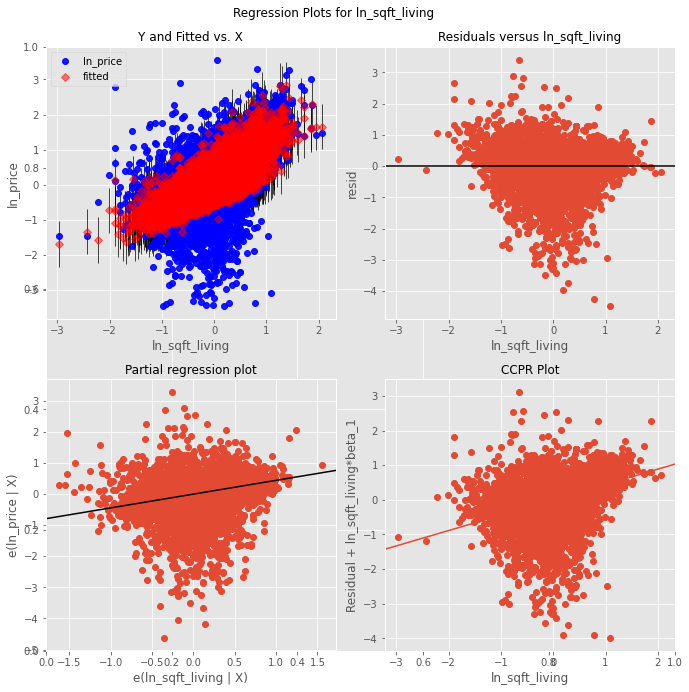

In [381]:
# Plots for evaluating the fit to specific parameters
fig,ax = plt.subplots(figsize=(10,10))
sm.graphics.plot_regress_exog(results,'ln_sqft_living',fig=fig)
plt.tight_layout()

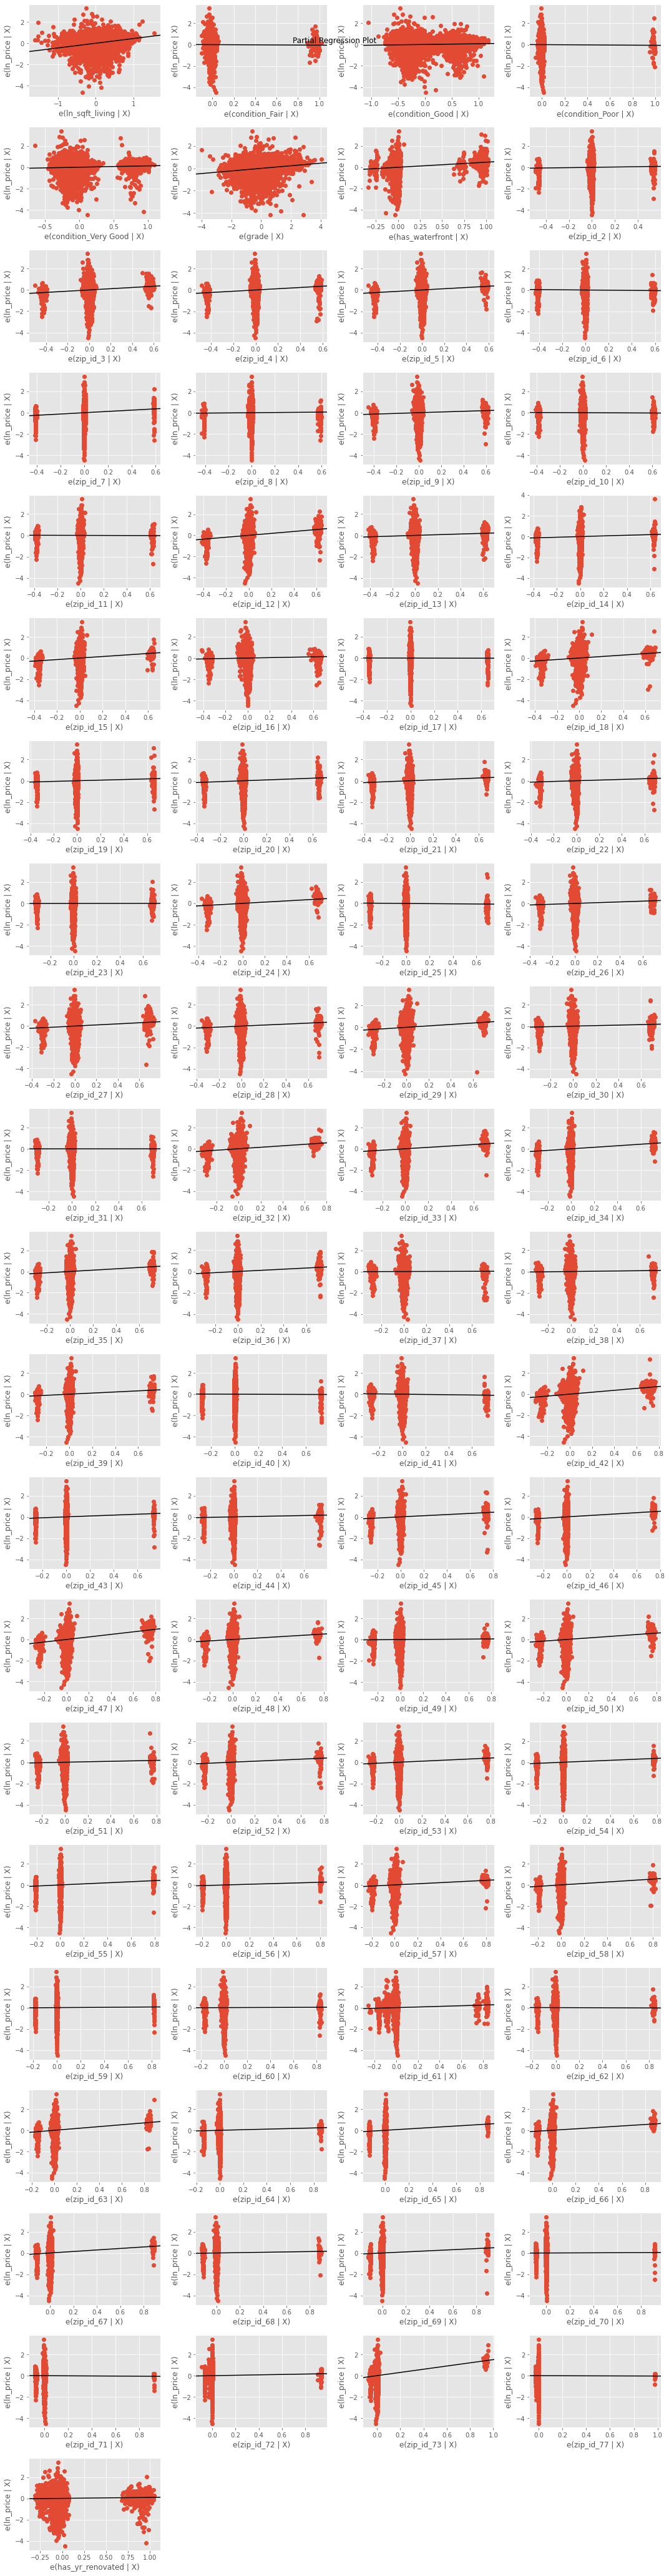

In [382]:
# Partial regression plots for the model parameters
fig = plt.figure(figsize=(15,60))
sm.graphics.plot_partregress_grid(
    results,
    exog_idx=list(X.columns),
    grid=(22,4),
    fig=fig)
plt.tight_layout()

### Interpretation of Models

### **Version 1**:<br>
**parameters**:<br>
1. const<br>
2. ln_sqft_living<br>

The price of a house should definitely be correlated with the size of the house, so square feet of living space is a good place to start.<br>

**Results**:<br>
Adjusted R-squared: 0.354<br>
F p-value: 0.00<br>
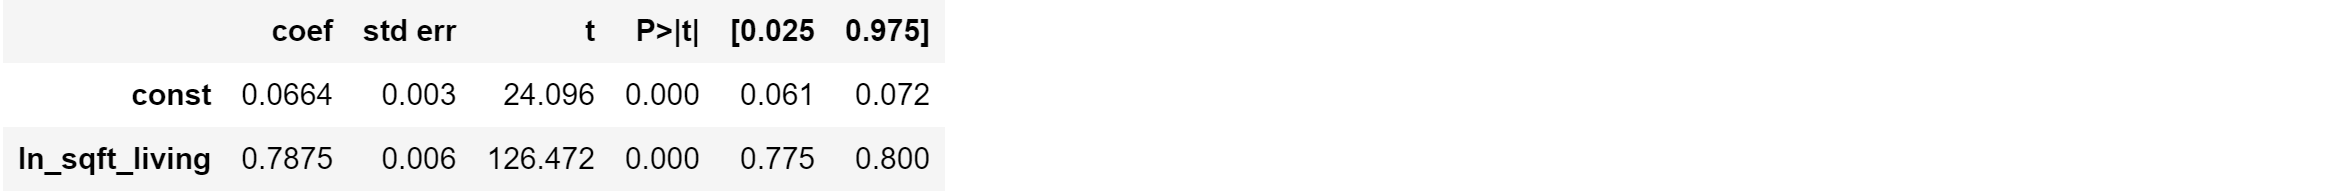

const meaning: Price is $927,560.62 for a home with median square feet of living space (1920 sq-ft)<br>
ln_sqft_meaning: Price 7.8% larger if sqft_living gets 10% larger<br>

**Interpretation**<br>
As expected, there is a statistically signficant trend between price and sqft_living. Growth in the size of the home is predicted to raise the price.<br>
There do appear to be some trends between other features and the residuals of the model, so I can add more independent variables to the model.

### **Version 2**:<br>
**parameters**:<br>
1. const<br>
2. ln_sqft_living<br>
3. grade<br>

I added in grade because it looked like there was still a trend with grade when compared to the residuals of model Version 1.<br>

**Results**:<br>
Adjusted R-squared: 0.429<br>
F p-value: 0.00<br>
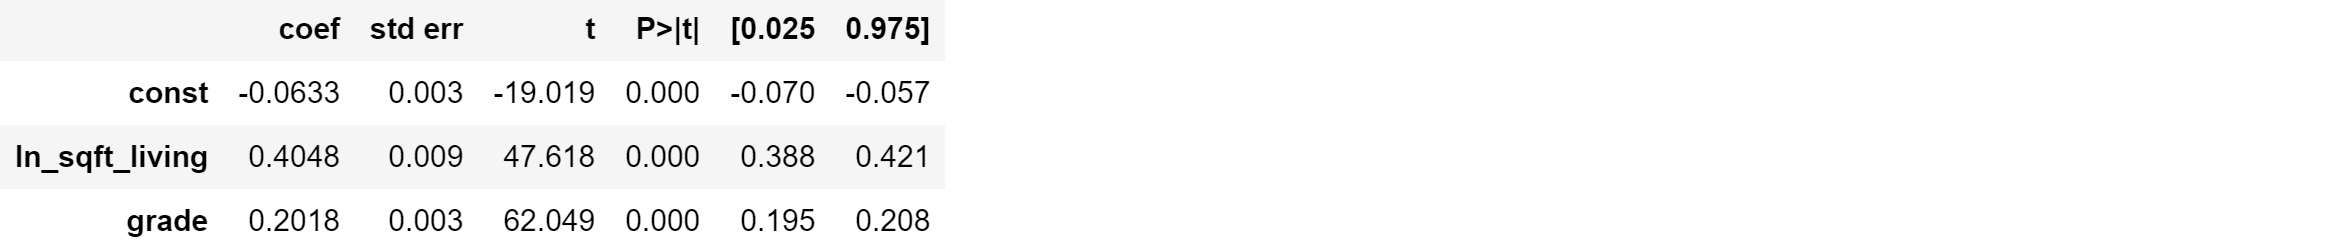

const meaning: Price is $814,783.68 for a home with:<br>
1. median square feet of living space (1940 sq-ft).<br>
2. a grade of 7.<br>

ln_sqft_living meaning: Price 3.9% larger if sqft_living gets 10% larger<br>
grade meaning: Price gets 22.4% larger if grade increases by 1<br>

**Interpretation**<br>
The adjusted R-squared rose to 0.429, meaning the model is accounting for more of the variance in price.<br>
Both sqft_living and grade had statistically significant trends.<br>
This model predicts that price goes up 3.9% when living area goes up by 10%.<br>
According to this model, the grade has a big effect; increasing the grade by 1 raises the price by 22.4%.

### **Version 3**:<br>
**parameters**:<br>
1. const<br>
2. ln_sqft_living<br>
3. grade<br>
4. has_waterfront<br>

This time, I introduced a categorical variable that says whether a house is a waterfront property.<br>

**Results**:<br>
Adjusted R-squared: 0.441<br>
F p-value: 0.00<br>
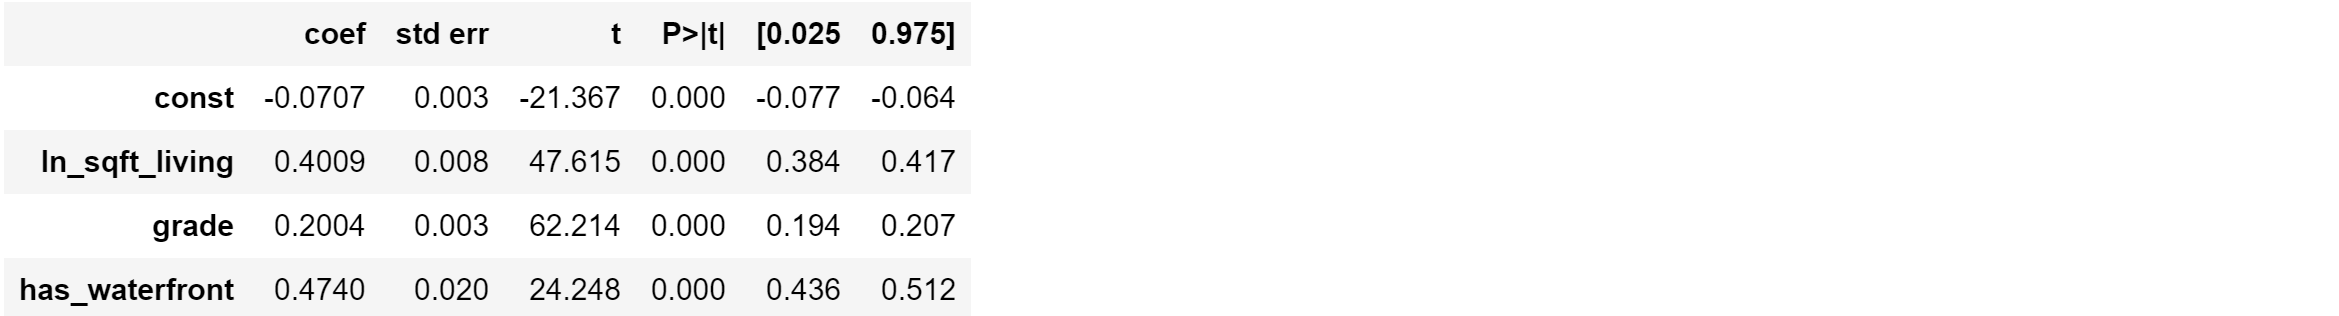

const meaning: Price is $808,767.80 for a home with:<br>
1. median square feet of living space (1940 sq-ft).<br>
2. a grade of 7.<br>
3. not on a waterfront.<br>

ln_sqft_living meaning: Price 3.9% larger if sqft_living gets 10% larger<br>
grade meaning: Price gets 22.2% larger if grade increases by 1<br>
has_waterfront meaning: A home on a waterfront will be worth 60.6% more than one that is not.<br>

**Interpretation**<br>
The adjusted R-squared rose to 0.441, a small increase from the last model.<br>
All the parameters had p-values below 0.05.<br>
The parameters for sqft_living and grade are nearly identical to the last model.<br>
This model says there is a big difference between being on a waterfront and not. Being on a waterfront makes the price 60.6% larger on average.

### **Version 4**:<br>
**parameters**:<br>
1 const<br>
2 ln_sqft_living<br>
3 grade<br>
4 has_waterfront<br>
5-77 zip_id_2 - zip_id_73, zip_id_77<br>

The previous model had 4 parameters. This one has 77. This is because I introduced zip code as a categorical variable.<br>

**Results**:<br>
Adjusted R-squared: 0.679<br>
F p-value: 0.00<br>
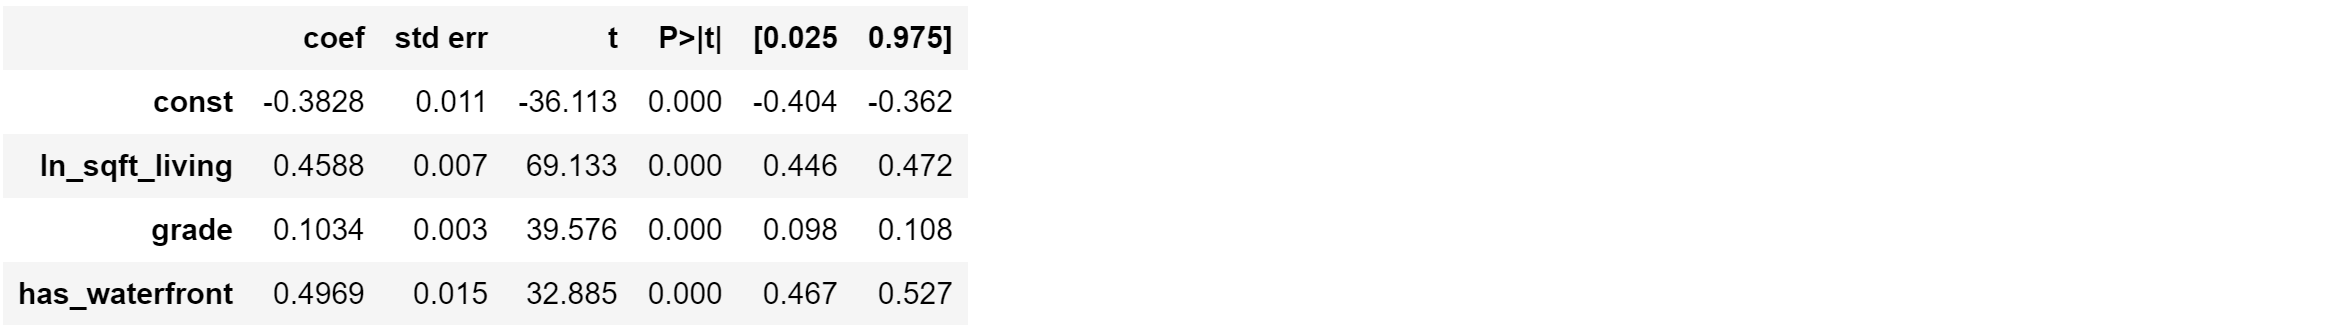
+73 parameters for zip_id

const meaning: Price is $591,935.49 for a home with:<br>
1. median square feet of living space (1940 sq-ft).<br>
2. a grade of 7.<br>
3. not on a waterfront.<br>
4. home in zip code 98042.<br>

ln_sqft_living meaning: Price 4.5% larger if sqft_living gets 10% larger<br>
grade meaning: Price gets 10.9% larger if grade increases by 1<br>
has_waterfront meaning: A home on a waterfront will be worth 64.4% more than one that is not.<br>
zip_id meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>

**Interpretation**<br>
The adjusted R-squared rose to 0.679, a sizable increase from the last model.<br>
All the parameters carried over from the last model had p-values below 0.05.<br>
The parameters for sqft_living and has_waterfront only changed slightly.<br>
The parameter for grade changed more drastically. Instead of predicting an increase of 22.2% when the grade increases by 1, it now predicts only an 10.9% increase.<br>
Of the 73 parameters for zip_id, 63 of them had p-values below 0.05. Since there are 73 parameters for zip code, I could also compare to 0.05/73 to reduce the number of false positives. Even when the alpha value is divided by 73, 59 of the zip_id parameters had values below the threshold. This shows that there is a significant trend with zip code.<br>

Many of the parameters are statistically significant, but how big of an actual effect is it? To determine this, I first took e to the power of the parameters. This turns the parameters into a value that you can multiply the baseline predictions by to get a predicted price. Since the baseline model assumes the zip code is 98042, these values essentially describe how much bigger the price of similar houses in other zip codes are. A value of 1.15 means the prices are predicted to be 15% larger.<br>

I also used the estimated error in the parameters to create a 95% confidence interval for these multiplicative factors. For 53 of the zip codes, the entire 95% confidence interval was above 1.1, meaning the houses in these zip codes are predicted to be at least 10% more expensive than the houses in 98042 at a high significance.<br>
34 of the zip codes have 95% confidence intervals entirely above 1.5, meaning these zip codes have houses at least 50% as expensive as those in 98042. Seven of the zip codes are predicted to have houses at least double the price of houses in 98042.

### **Version 5**:<br>
**parameters**:<br>

1 const<br>
2 ln_sqft_living<br>
3 grade<br>
4 has_waterfront<br>
5-8 condition parameters (Fair, Good, Poor, Very Good)<br>
9-81 zip_id_2 - zip_id_73, zip_id_77<br>

This model is the same as the last, except with 4 more parameters for the condition.<br>

**Results**:<br>
Adjusted R-squared: 0.684<br>
F p-value: 0.00<br>
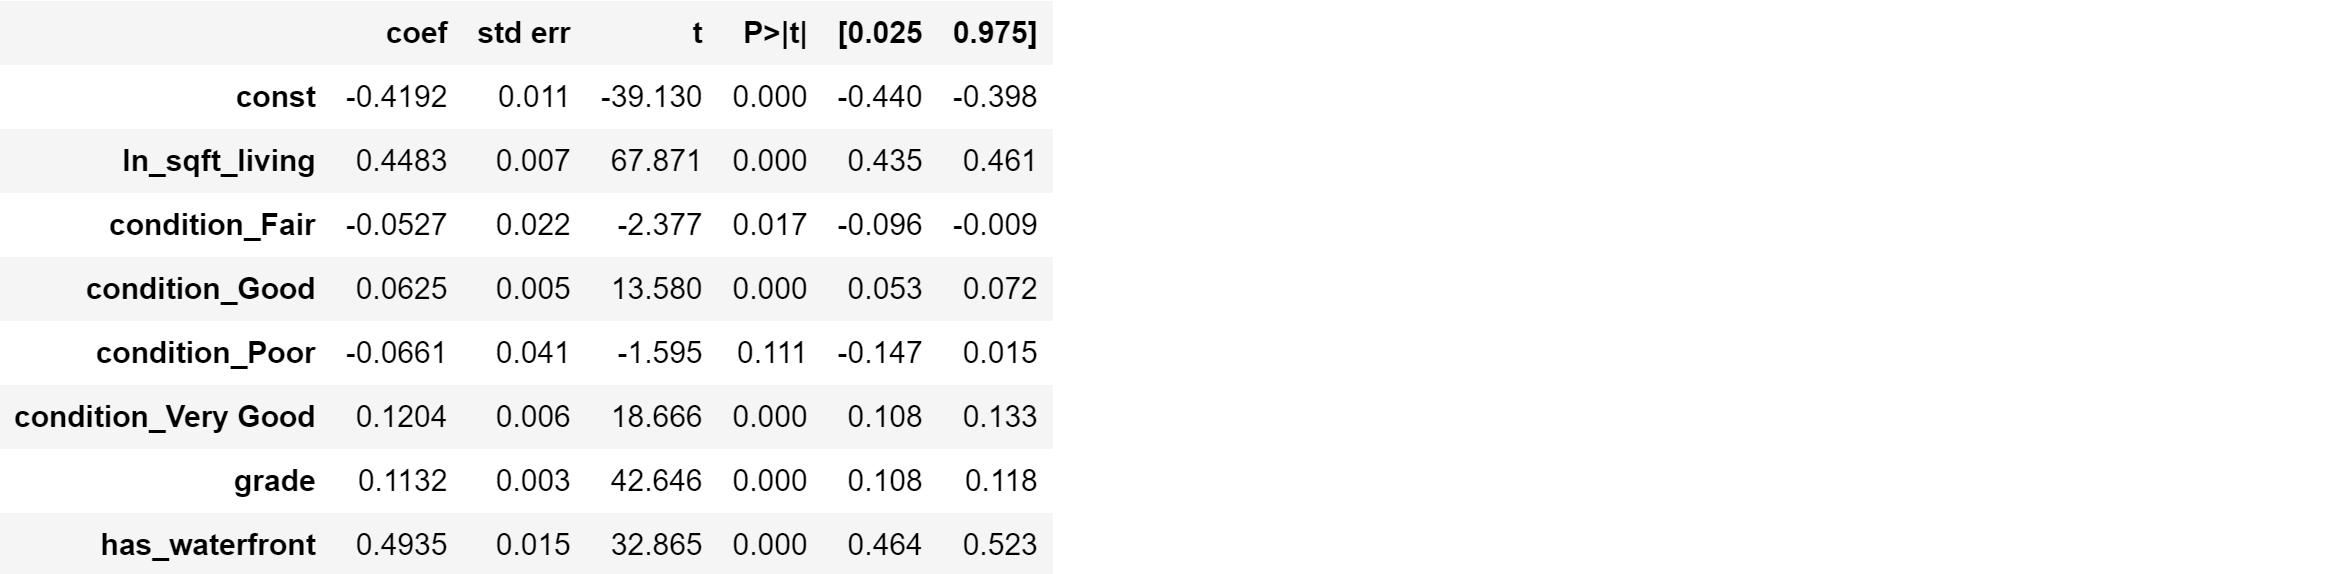
+73 parameters for zip_id

const meaning: Price is $570,764.95 for a home with:<br>
1. median square feet of living space (1940 sq-ft).<br>
2. a grade of 7.<br>
3. not on a waterfront.<br>
4. home in zip code 98042.<br>
5. condition is Average. <br>

ln_sqft_living meaning: Price 4.4% larger if sqft_living gets 10% larger<br>
grade meaning: Price gets 12.0% larger if grade increases by 1<br>
has_waterfront meaning: A home on a waterfront will be worth 63.8% more than one that is not.<br>
zip_id meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>
condition meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>

**Interpretation**<br>
The adjusted R-squared rose to 0.684, a small increase compared to Version 4.<br>
All the parameters aside from those associated with zip code and condition have p-values below 0.05.<br>
The parameters for sqft_living, has_waterfront, and grade only changed slightly.<br>

The parameters for zip code are nearly identical as the last model. The number of parameters with p-values below 0.05/73 remained the same and the actual values of the parameters did not change substantially.<br>

All four condition parameters were significant at a significance level of 0.05.<br>

The price of a home with a Very Good condition will cost 12.8% more than an Average home (all else being equal).<br>
For Good, Fair, and Poor, those numbers are 6.4% more, 5.1% less, and 6.4% less, respectively.<br>
All of these results make sense. They indicate that as condition goes up (Poor->Fair->Average->Good->Very Good), the price increases.

### **Version 6**:<br>
**parameters**:<br>

1 const<br>
2 ln_sqft_living<br>
3 grade<br>
4 has_waterfront<br>
5-8 condition parameters (Fair, Good, Poor, Very Good)<br>
9-81 zip_id_2 - zip_id_73, zip_id_77<br>
82 has_yr_renovated<br>
83 yr_renovated<br>

This model is the same as the last, except with a parameter that indicates whether the house was renovated and another to scale with the year it was renovated.<br>

**Results**:<br>
Adjusted R-squared: 0.686<br>
F p-value: 0.00<br>
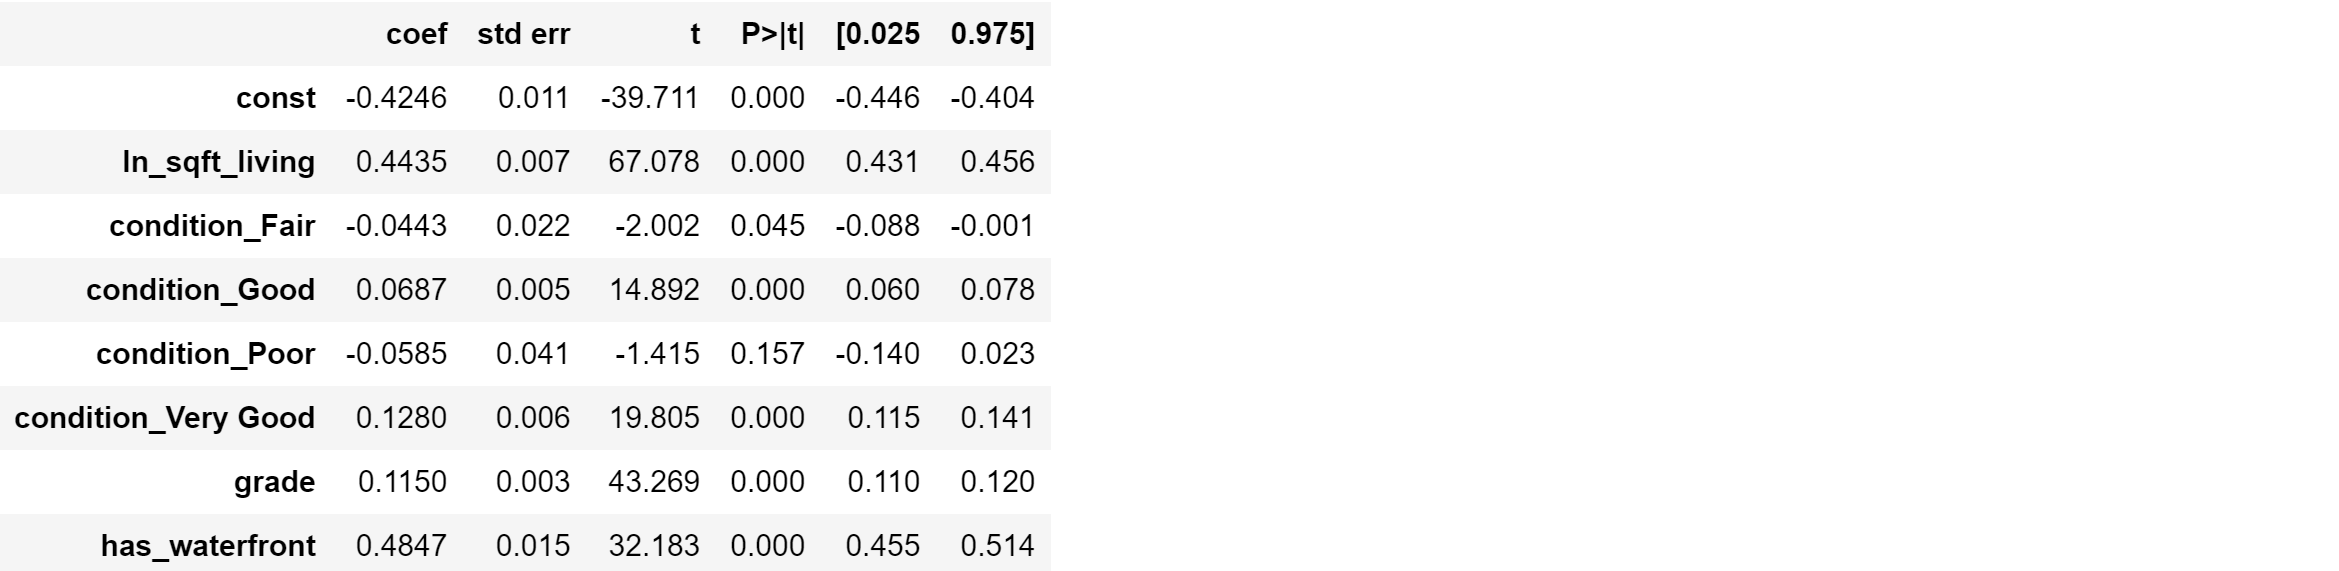
+73 parameters for zip_id
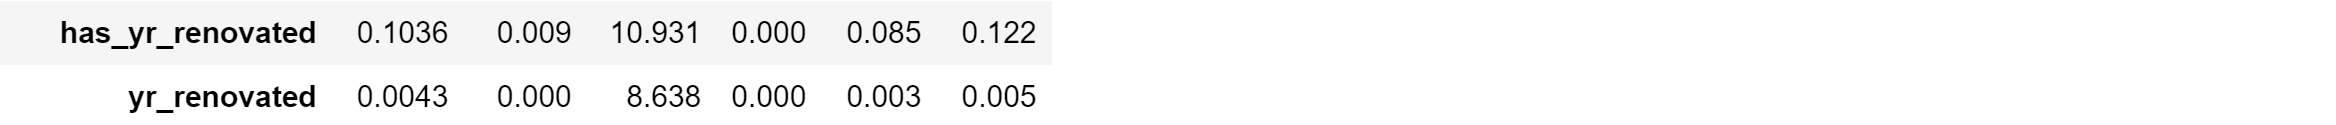

const meaning: Price is $567,681.63 for a home with:<br>
1. median square feet of living space (1940 sq-ft).<br>
2. a grade of 7.<br>
3. not on a waterfront.<br>
4. home in zip code 98042.<br>
5. condition is Average.<br>
6. Not renovated.<br>

ln_sqft_living meaning: Price 4.3% larger if sqft_living gets 10% larger<br>
grade meaning: Price gets 12.2% larger if grade increases by 1<br>
has_waterfront meaning: A home on a waterfront will be worth 62.4% more than one that is not.<br>
zip_id meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>
condition meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>
has_yr_renovated meaning: Price gets 10.9% larger if the house has been renovated.<br>
yr_renovated meaning: The more recent a renovation, the more it raises the price. The price is multiplied by 1.0043^(year-2002). The 2002 in the model is because yr_renovated had its median subtracted before doing the fit. It might seem like houses renovated prior to 2002 actually lower the price since 1.0043 to a negative power would be less than 0. However, the renovation still achieves the 10.9% increase because a renovation was done. <br>

**Interpretation**<br>
The adjusted R-squared rose to 0.686, barely a change from the previous model.<br>
All the parameters aside from those associated with zip code and condition have p-values below 0.05.<br>
The parameters for sqft_living, has_waterfront, and grade only changed slightly from Version 5.<br>

The parameters for zip code were not affected by the addition of new parameters. The number of parameters with p-values below 0.05/73 remained the same and the actual values of the parameters did not change substantially.<br>

All four condition parameters were significant at a significance level of 0.05.<br>

The actual parameter values for condition did change slightly:
The price of a home with a Very Good condition will cost 13.7% more than an Average home (all else being equal).<br>
For Good, Fair, and Poor, those numbers are 7.1% more, 4.3% less, and 5.6% less, respectively.<br>

The has_yr_renovated parameter indicates that performing renovations tends to raise the price of a house by about 11%. The timing of the renovations also matters because more recent renovations tend to raise the price more. The difference is 0.43% per year.

### **Version 7**:<br>
**parameters**:<br>

1 const<br>
2 ln_sqft_living<br>
3 grade<br>
4 has_waterfront<br>
5-8 condition parameters (Fair, Good, Poor, Very Good)<br>
9-81 zip_id_1 - zip_id_78<br>
82 has_yr_renovated<br>

This model is the same as the last, except with the yr_renovated parameter removed (has_yr_renovated is still present).<br>

**Results**:<br>
Adjusted R-squared: 0.685<br>
F p-value: 0.00<br>
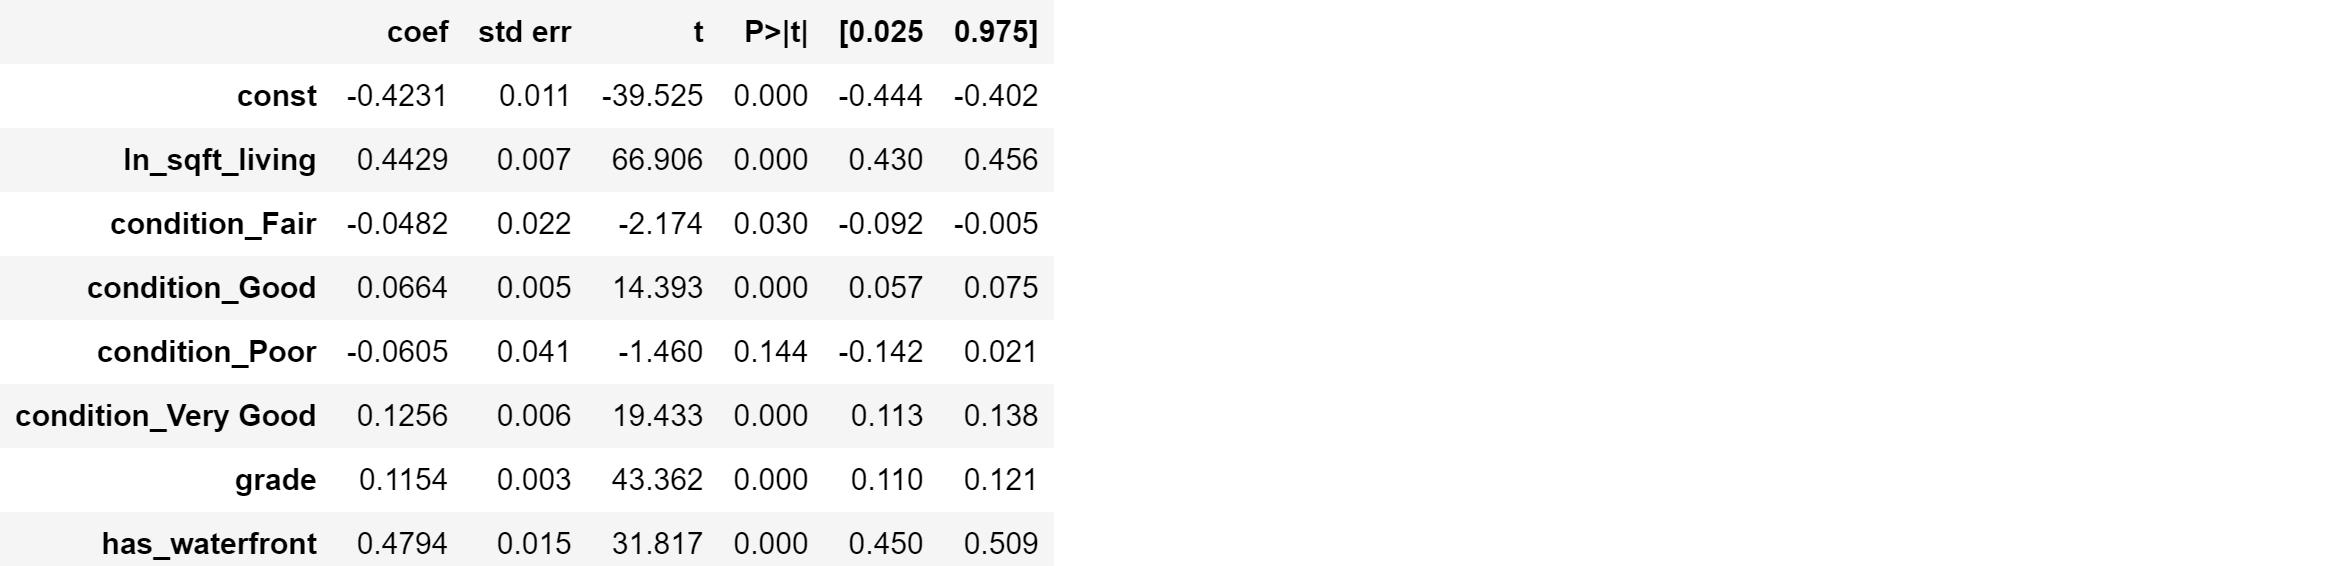
+73 parameters for zip_id
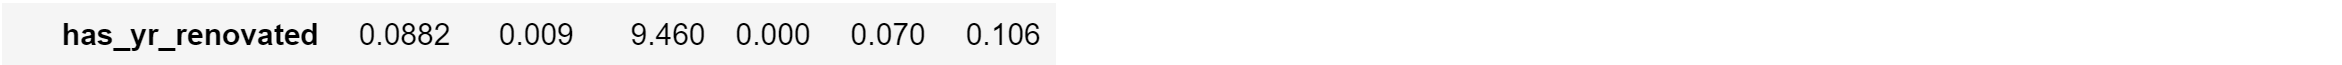

const meaning: Price is $568,539.04 for a home with:<br>
1. median square feet of living space (1940 sq-ft).<br>
2. a grade of 7.<br>
3. not on a waterfront.<br>
4. home in zip code 98042.<br>
5. condition is Average.<br>
6. Not renovated.<br>

ln_sqft_living meaning: Price 4.3% larger if sqft_living gets 10% larger<br>
grade meaning: Price gets 12.2% larger if grade increases by 1<br>
has_waterfront meaning: A home on a waterfront will be worth 61.5% more than one that is not.<br>
zip_id meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>
condition meaning: Taking e to the power of the parameter says how much to multiply the baseline predictions by.<br>
has_yr_renovated meaning: Price gets 9.2% larger if the house has been renovated.<br>

**Interpretation**<br>
The adjusted R-squared rose to 0.685, the same as the previous model.<br>
All the parameters aside from those associated with zip code and condition have p-values below 0.05.<br>
The parameters for sqft_living, has_waterfront, and grade only changed slightly from Version 6.<br>

The parameters for zip code were not affected by the addition of new parameters. The number of parameters with p-values below 0.05/78 remained the same and the actual values of the parameters did not change substantially.<br>

All four condition parameters were significant at a significance level of 0.05.<br>

The actual parameter values for condition did change slightly:
The price of a home with a Very Good condition will cost 13.4% more than an Average home (all else being equal).<br>
For Good, Fair, and Poor, those numbers are 6.9% more, 4.7% less, and 5.8% less, respectively.<br>

The has_yr_renovated parameter indicates that performing renovations tends to raise the price of a house by about 9%.<br>
I removed the yr_renovated parameter because it made predictions that don't make sense for houses renovated a long time ago. One would expect that more recent renovations would raise the price more and the yr_renovated parameter did achieve that. However, if you go back far enough in time, the model would predict that making renovations would actually decrease the value of a house. This does not make much sense, so the parameter was removed.

### Visualizing Results
Below, I create a visual that shows how certain factors affect the price

Text(0.5, 1.0, 'How Price Changes if House is Improved')

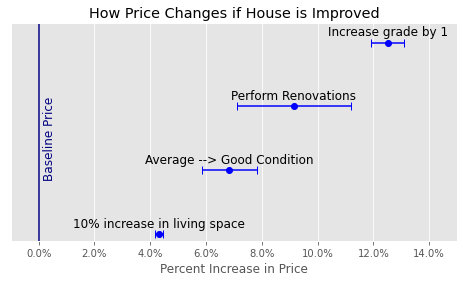

In [175]:
# Errorbar plot showing effect of changing certain features
fig, ax = plt.subplots( figsize = (8,4) )

plot_stuff = [['ln_sqft_living','mult_10percent','10% increase in living space','CI95_10percent'],\
             ['condition_Good','mult_add1','Average --> Good Condition','CI95_add1'],\
             ['has_yr_renovated','mult_add1','Perform Renovations','CI95_add1'],\
             ['grade','mult_add1','Increase grade by 1','CI95_add1']]

ax.axvline(x=1, color = (0.0,0.0,0.5,1.0))
ax.text(1.004, 1.5, 'Baseline Price', rotation = 'vertical', fontsize = 12, \
        verticalalignment = 'center', horizontalalignment = 'center', color = (0.0,0.0,0.5,1.0))

n = 0
for stuff in plot_stuff:
    mean = df_results.loc[stuff[0]][stuff[1]]
    err_low = mean - df_results.loc[stuff[0]][stuff[3]+'_low']
    err_high = df_results.loc[stuff[0]][stuff[3]+'_high'] - mean
    ax.errorbar(x = df_results.loc[stuff[0]][stuff[1]], y = n, xerr=[[err_low],[err_high]], fmt='o', capsize = 4, \
                color = (0.0,0.0,1.0,1.0))
    ax.text(df_results.loc[stuff[0]][stuff[1]], n + 0.17, stuff[2], fontsize = 12, \
            verticalalignment = 'center', horizontalalignment = 'center')
    n += 1

ax.set_yticks([])
ax.set_ybound([-0.1,3.3])
ax.set_xbound([0.99,1.15])
ax.set_xticks(np.linspace(1,1.14,8))
ax.set_xticklabels([f"{round(100*(x-1),0)}%" for x in np.linspace(1,1.14,8)])
ax.set_xlabel('Percent Increase in Price')
ax.set_title('How Price Changes if House is Improved')

I was originally going to use a horizontal bar plot rather than an errorbar plot. The reason was because I thought it would be more intuitive since you could compare the size of the baseline bar to the other bars. However, this meant that a lot of space on the plot was wasted, the errorbars were quite small, and it was hard to read off the exact values.

In [ ]:
RECOMMENDATION SECTION

[]

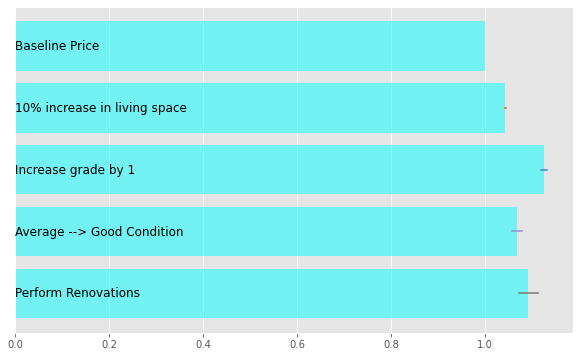

In [116]:
# Bar plot showing how price changes as features are changed
fig, ax = plt.subplots( figsize = (10,6) )

plot_stuff = [['ln_sqft_living','mult_10percent','10% increase in living space','CI95_10percent'],\
             ['grade','mult_add1','Increase grade by 1','CI95_add1'],\
             ['condition_Good','mult_add1','Average --> Good Condition','CI95_add1'],\
             ['has_yr_renovated','mult_add1','Perform Renovations','CI95_add1']]

ax.barh(width = 1, height = 0.8, y = 1, color = (0.0, 1, 1, 0.5))
ax.text(0,1,'Baseline Price',fontsize = 12, verticalalignment = 'center', horizontalalignment = 'left')

n = 0
for stuff in plot_stuff:
    ax.barh(width = df_results.loc[stuff[0]][stuff[1]], \
           height = 0.8, y = n, color = (0.0,1.0,1.0,0.5))
    
    ax.text(0, n, stuff[2], fontsize = 12, verticalalignment = 'center', horizontalalignment = 'left')
    
    ax.plot([df_results.loc[stuff[0]][stuff[3]+'_low'],\
             df_results.loc[stuff[0]][stuff[3]+'_high']],[n,n])
    
    n -= 1
ax.set_yticks([])

### Uncertainties
The model can make predictions, but I want to be able to provide a confidence interval rather than just one value.

The uncertainty comes from two sources: uncertainty in the parameters and variance not accounted for in the model.

**Parameter uncertainty**
Along with values of the parameters, statsmodels also estimates uncertainties in the parameters in the form of a covariance matrix. It is important to use the entire covariance matrix and not just the variance of each individual parameter because some parameters might be correlated.

To find how the covariance of the parameters affects the price estimate, I need to propagate the errors. To propagate the errors, we need to take partial derivatives of each parameter of our linear model.

**Linear Model:**
$\hat{y} = B_0 + \sum_{n=1}^N B_n x_n$

**Partial Derivatives**

$\frac{\partial \hat{y}}{\partial B_0} = 1$

$\frac{\partial \hat{y}}{\partial B_i} = x_i$

The variance in the predicted price is given by this formula:

$\sigma_{\hat{y}}^2 = \sum_{i=0}^N \sum_{j=0}^N \left(\frac{\partial \hat{y}}{\partial B_i}\right)\left(\frac{\partial \hat{y}}{\partial B_j}\right) C_{ij}$

$\sigma_{\hat{y}}^2 = \sum_{i=0}^N \sum_{j=0}^N x_i x_j C_{ij}$

where $C$ is the covariance matrix. We can treat $x_0$ as being all 1's for this formula.

For this project, the $x$ values might be the natural log of a feature or be shifted by the median, but it doesn't matter. I just need to make sure that whatever I plug in for the $x$ values has been processed in exactly the same way as the data that was fed to the model. The uncertainty will depend on the values I plug in. For example, I house with a high grade will have a higher uncertainty in the price than one with an average grade (all else being equal).

Once I have $\sigma_{\hat{y}}$, I can use it to get a confidence interval on ln(price), then I can exponentiate to turn the prediction and confidence interval into a price in dollars.

**Residual Uncertainty**
Since the R-squared value is around 68%, that means that 32% of the variance in ln(price) is explained by the model. That means there is also random uncertainty on top of the uncertainty from the parameters. Thus, the final formula for estimating the uncertainty in ln(price) is given by:

$\sigma_{\hat{y}}^2 = \sigma_{res}^2 + \sum_{i=0}^N \sum_{j=0}^N x_i x_j C_{ij}$

where $\sigma_{res}^2$ is the variance from the residuals. I could estimate this by simply calculating the sample variance of the residuals. However, since the distribution of the residuals was much more strongly peaked than a normal distribution, I could also estimate it by taking finding the 15.85% and 84.15% quantiles and taking half of the interval between them. This would give me a reasonable 68.3% confidence interval for the residuals.

### Predictions
Below is a function that can be used to predict the price of a house in King County, WA.
It can also produce a 95% confidence interval for the prediction which takes into account both the variance (and covariance) of the parameters and the variance that is not explained by the model.

In [192]:
def price_predictor(res, x):
    """
    Input:
    res: The results of a linear regression
    x: Values for the independent variables for which we want a prediction
    x must be just one array of values. If you want multiple predictions, just call the function multiple times.
    
    Output:
    y: predicted value
    sigma_y = error of the predicted value
    """
    
    # Price prediction
    y = res.params[0] + sum(res.params[1:] * x)
    
    # Uncertainty from parameter covariance
    sigma_y = res.cov_params()['const']['const']
    sigma_y = sigma_y + sum(2 * res.cov_params()['const'][1:] * x)
    sigma_y = sigma_y + np.matmul( np.matmul( x.T , np.array(res.cov_params())[1:,1:]) , x )
    
    # Uncertainty from residuals
    qvals = stats.mstats.mquantiles(res.resid, prob=[0.1585,0.8415])
    sigma_y = sigma_y + ( (qvals[1] - qvals[0])/2 )**2
    
    return y, np.sqrt(sigma_y)

In [236]:
# Use the function above to make predictions about prices and compare to actual price
# Choose a record from the data
house = 361
lnprice, sigma_lnprice = price_predictor(results, np.array(X.iloc[house]))
#print(lnprice, sigma_lnprice)

price = np.exp( lnprice + np.log(np.median(df['price'])) )
price_95low = np.exp( lnprice + np.log(np.median(df['price'])) - 2*sigma_lnprice)
price_95high = np.exp( lnprice + np.log(np.median(df['price'])) + 2*sigma_lnprice)
price_predict = np.exp( y[house] + np.log(np.median(df['price'])) )

print(f"Predicted price: ${round(price,2)} \t Actual price: ${round(price_predict,2)}")
print()
print(f"95% Confidence interval: [${round(price_95low,2)} - ${round(price_95high,2)}]")

Predicted price: $1382365.49 	 Actual price: $1250000.0

95% Confidence interval: [$905737.46 - $2109810.43]


### Jackknife test
Below, I choose a random sample comprising 90% of the data and I create a new model.
Then, I use that model to predict the prices of the remaining 10% of the data.
The comparisons between the predictions and real prices will give me a sense of how good the model is.

In [185]:
np.random.seed(123)
rando_numbers = np.random.random(len(df_adj))
rando_numbers

array([0.69646919, 0.28613933, 0.22685145, ..., 0.49399694, 0.56422916,
       0.12463925])

In [187]:
df_adj_sub90 = df_adj[rando_numbers < 0.9]  # Used to make new model
df_adj_sub10 = df_adj[rando_numbers >= 0.9] # Used for testing the new model

27216

In [189]:
# Make new model using 90% of the data

features = [['ln_sqft_living','numerical',1], \
            ['ln_sqft_lot','numerical',0], \
            ['ln_sqft_basement','num-cat',0], \
            ['ln_sqft_garage','num-cat',0], \
            ['ln_sqft_patio','num-cat',0], \
            ['bedrooms','numerical',0], \
            ['bathrooms','numerical',0], \
            ['floors','numerical',0], \
            ['yr_built','numerical',0], \
            ['condition','categorical',1], \
            ['grade','numerical',1], \
            ['waterfront','YN',1], \
            ['greenbelt','YN',0], \
            ['nuisance','YN',0], \
            ['view','categorical',0], \
            ['zip_id','categorical',1], \
            ['yr_renovated','num-cat2',1]]

y_sub90 = df_adj_sub90['ln_price']

in_fit = df_adj_sub90[['ln_price']]
for feat in features:
    if feat[2] == 1:
            
        if feat[1] == 'numerical': in_fit[feat[0]] = df_adj_sub90[feat[0]]
                
        if feat[1] == 'num-cat':
            in_fit['has_'+feat[0]] = df_adj_sub90[feat[0]].apply(lambda x: 0 if x == -10 else 1)
            in_fit[feat[0]] = df_adj_sub90[feat[0]] * in_fit['has_'+feat[0]]
            
        if feat[1] == 'num-cat2':
            in_fit['has_'+feat[0]] = df_adj_sub90[feat[0]].apply(lambda x: 0 if x == -100 else 1)
            #in_fit[feat[0]] = df_adj_sub90[feat[0]] * in_fit['has_'+feat[0]]
                
        if feat[1] == 'categorical':
            in_fit[feat[0]] = df_adj_sub90[feat[0]]
            in_fit = pd.get_dummies(in_fit, columns=[feat[0]], drop_first=True)
                
        if feat[1] == 'YN': in_fit['has_'+feat[0]] = df_adj_sub90[feat[0]].apply(lambda x: 1 if x == 'YES' else 0)

X_sub90 = in_fit.drop(columns = 'ln_price')
results_sub90 = sm.OLS(y_sub90,sm.add_constant(X_sub90)).fit()
results_sub90.summary()

<ipython-input-189-17ce1928e433>:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if feat[1] == 'numerical': in_fit[feat[0]] = df_adj_sub90[feat[0]]
<ipython-input-189-17ce1928e433>:38: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_fit[feat[0]] = df_adj_sub90[feat[0]]


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               ln_price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.680
Method:                 Least Squares   F-statistic:                     672.7
Date:                Mon, 19 Jun 2023   Prob (F-statistic):               0.00
Time:                        14:42:48   Log-Likelihood:                -8471.5
No. Observations:               27216   AIC:                         1.712e+04
Df Residuals:                   27129   BIC:                         1.783e+04
Df Model:                          86                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  -0.3050      0.011    -27.083      0.000      -0.327      -0.283
ln_sqft_living          0.4473      0.007     64.982      0.000       0.434       0.461
condition_Fair         -0.0538      0.023     -2.331      0.020      -0.099      -0.009
condition_Good          0.0642      0.005     13.140      0.000       0.055       0.074
condition_Poor         -0.0750      0.044     -1.698      0.090      -0.162       0.012
condition_Very Good     0.1264      0.007     18.464      0.000       0.113       0.140
grade                   0.1169      0.003     42.256      0.000       0.111       0.122
has_waterfront          0.4737      0.016     30.303      0.000       0.443       0.504
zip_id_1                0.1506      0.016      9.269      0.000       0.119       0.182
zip_id_2                0.5766      0.017     34.291      0.000       0.544       0.610
zip_id_3                0.5893      0.017     34.888      0.000       0.556       0.622
zip_id_4                0.5869      0.017     34.892      0.000       0.554       0.620
zip_id_5               -0.0870      0.017     -5.038      0.000      -0.121      -0.053
zip_id_6                0.6084      0.017     35.269      0.000       0.575       0.642
zip_id_7                0.0889      0.017      5.139      0.000       0.055       0.123
zip_id_8                0.3311      0.018     18.864      0.000       0.297       0.365
zip_id_9               -0.0434      0.018     -2.451      0.014      -0.078      -0.009
zip_id_10              -0.0348      0.018     -1.933      0.053      -0.070       0.000
zip_id_11               0.9078      0.018     50.236      0.000       0.872       0.943
zip_id_12               0.3389      0.018     18.863      0.000       0.304       0.374
zip_id_13               0.3098      0.018     17.179      0.000       0.274       0.345
zip_id_14               0.7196      0.018     39.353      0.000       0.684       0.755
zip_id_15               0.1959      0.019     10.566      0.000       0.160       0.232
zip_id_16              -0.0091      0.019     -0.483      0.629      -0.046       0.028
zip_id_17               0.6964      0.019     36.553      0.000       0.659       0.734
zip_id_18               0.2989      0.019     15.914      0.000       0.262       0.336
zip_id_19               0.4034      0.019     21.383      0.000       0.366       0.440
zip_id_20               0.4368      0.019     22.728      0.000       0.399       0.474
zip_id_21               0.3124      0.020     16.004      0.000       0.274       0.351
zip_id_22               0.0116      0.020      0.585      0.558      -0.027       0.050
zip_id_23               0.5916      0.020     30.020      0.000       0.553       0.630
zip_id_24              -0.0767      0.020     -3.847      0.000      -0.116      -0.038
zip

In [190]:
# Make new X DataFrame using 10% of the data
y_sub10 = df_adj_sub10['ln_price']

in_fit = df_adj_sub10[['ln_price']]
for feat in features:
    if feat[2] == 1:
            
        if feat[1] == 'numerical': in_fit[feat[0]] = df_adj_sub10[feat[0]]
                
        if feat[1] == 'num-cat':
            in_fit['has_'+feat[0]] = df_adj_sub10[feat[0]].apply(lambda x: 0 if x == -10 else 1)
            in_fit[feat[0]] = df_adj_sub10[feat[0]] * in_fit['has_'+feat[0]]
            
        if feat[1] == 'num-cat2':
            in_fit['has_'+feat[0]] = df_adj_sub10[feat[0]].apply(lambda x: 0 if x == -100 else 1)
            #in_fit[feat[0]] = df_adj_sub10[feat[0]] * in_fit['has_'+feat[0]]
                
        if feat[1] == 'categorical':
            in_fit[feat[0]] = df_adj_sub10[feat[0]]
            in_fit = pd.get_dummies(in_fit, columns=[feat[0]], drop_first=True)
                
        if feat[1] == 'YN': in_fit['has_'+feat[0]] = df_adj_sub10[feat[0]].apply(lambda x: 1 if x == 'YES' else 0)

X_sub10 = in_fit.drop(columns = 'ln_price')

<ipython-input-190-3059a7946b60>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if feat[1] == 'numerical': in_fit[feat[0]] = df_adj_sub10[feat[0]]
<ipython-input-190-3059a7946b60>:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  in_fit[feat[0]] = df_adj_sub10[feat[0]]


In [204]:
X_sub10.loc[6]

ln_sqft_living         0.080043
condition_Fair         0.000000
condition_Good         1.000000
condition_Poor         0.000000
condition_Very Good    0.000000
                         ...   
zip_id_75              0.000000
zip_id_76              0.000000
zip_id_77              0.000000
zip_id_78              0.000000
has_yr_renovated       0.000000
Name: 6, Length: 86, dtype: float64

In [209]:
# Compare predictions to actual prices for 10% of the data
price_ratio = np.array([price_predictor(results_sub90, np.array(X.loc[i]))[0] for i in X_sub10.index])
price_ratio = np.exp(price_ratio - y_sub10)
print(price_ratio)

6        0.751183
38       0.902079
47       1.040884
84       0.560832
91       1.017630
           ...   
30118    0.378684
30137    0.889819
30138    1.139238
30140    0.654270
30149    1.317976
Name: ln_price, Length: 2938, dtype: float64


In [219]:
len(price_ratio[(price_ratio > 0.75) & (price_ratio < 1.25)]) / len(price_ratio)

0.7491490810074881

About 75% of the predictions were within 75% to 125% of the actual price.

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   1.,   1.,
          0.,   3.,   4.,   5.,   6.,  10.,  16.,  41., 141., 411., 756.,
        815., 456., 149.,  43.,  22.,  14.,  11.,   9.,   2.,   2.,   5.,
          2.,   3.,   3.,   1.,   0.,   0.,   1.,   1.,   0.,   0.,   1.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([-3.42342442, -3.26922091, -3.1150174 , -2.96081389, -2.80661038,
        -2.65240687, -2.49820335, -2.34399984, -2.18979633, -2.03559282,
        -1.88138931, -1.7271858 , -1.57298229, -1.41877878, -1.26457527,
        -1.11037176, -0.95616825, -0.80196474, -0.64776123, -0.49355772,
        -0.33935421, -0.1851507 , -0.03094719,  0.12325632,  0.27745983,
         0.43166334,  0.58586685,  0.74007036,  0.89427387,  1.04847738,
         1.20268089,  1.35688441,  1.51108792,  1.66529143,  1.81949494,
         1.97369845,  2.12790196,  2.28210547,  2.43630898,  2.59051249,
         2.744716  ,  2.89891951,  3.05312302,  3.20732653,  3.36153004,
 

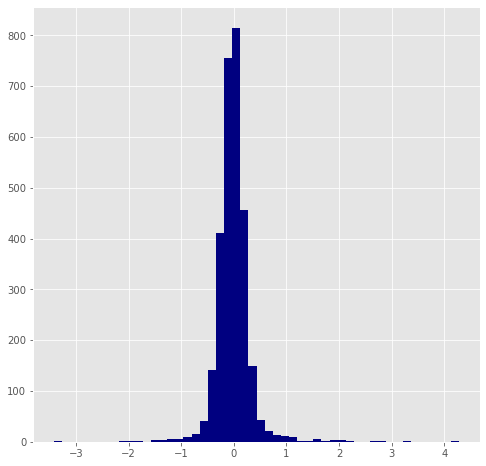

In [212]:
# Make plot of residuals for the jackknife test
fig, ax = plt.subplots( figsize = (8,8) )

ax.hist(np.log(price_ratio), bins = 50, color = (0.0,0.0,0.5,1.0))

In [240]:
lnprice = np.array([price_predictor(results_sub90, np.array(X.loc[i]))[0] for i in X_sub10.index]) + np.log(np.median(df['price']))

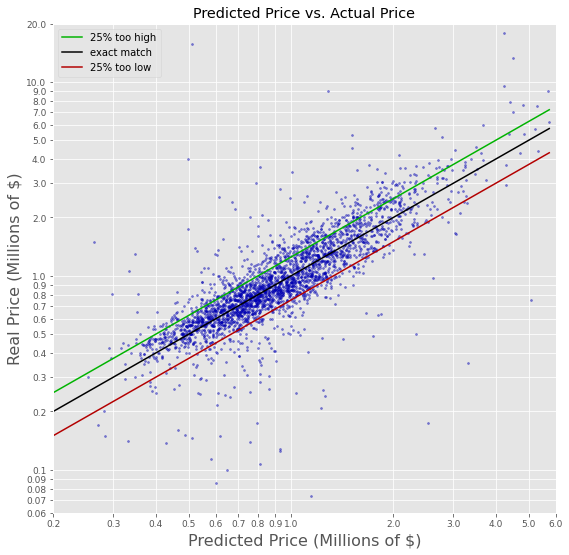

In [295]:
# Scatter plot of predicted and real prices
fig, ax = plt.subplots( figsize = (9,9) )

ax.scatter(lnprice, y_sub10 + np.log(np.median(df['price'])), color = (0.0,0.0,0.7,0.5), s = 4)

ax.plot([np.min(lnprice),np.max(lnprice)], [np.min(lnprice)+np.log(1.25),np.max(lnprice)+np.log(1.25)], \
        color = (0.0,0.7,0.0,1.0), label='25% too high')

ax.plot([np.min(lnprice),np.max(lnprice)], [np.min(lnprice),np.max(lnprice)], color = (0.0,0.0,0.0,1.0), \
        label='exact match')

ax.plot([np.min(lnprice),np.max(lnprice)], [np.min(lnprice)+np.log(0.75),np.max(lnprice)+np.log(0.75)], \
        color = (0.7,0.0,0.0,1.0), label='25% too low')

ax.set_xlabel('Predicted Price (Millions of $)', fontsize = 16)
ax.set_ylabel('Real Price (Millions of $)', fontsize = 16)
ax.set_title('Predicted Price vs. Actual Price')
ax.legend(loc='upper left')

log_ticks = np.append(\
                      np.append(\
                                np.append(\
                                          np.linspace(10**4,9*10**4,9),np.linspace(10**5,9*10**5,9)\
                                         ),np.linspace(10**6,9*10**6,9)\
                               ),np.linspace(10**7,9*10**7,9)\
                     )

ax.set_xticks(np.log(log_ticks))
ax.set_xticklabels([x/10**6 if i%1 == 0 else '' for i,x in enumerate(log_ticks)], fontsize = 9)
ax.set_yticks(np.log(log_ticks))
ax.set_yticklabels([x/10**6 if i%1 == 0 else '' for i,x in enumerate(log_ticks)], fontsize = 9)
ax.set_xbound([np.log(200000),np.log(6000000)])
ax.set_ybound([np.log(60000),np.log(20000000)])

In [228]:
df[df['address'].str.contains('1528 19th')]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,state,zip,zip_id
21793,7228502286,2022-01-26,27563.0,3,2.5,2320,2690,2.0,NO,NO,...,0,490,2008,0,"1528 19th Avenue, Seattle, Washington 98122, U...",47.61495,-122.30698,Washington,98122,26


Text(0, 0.5, 'bedrooms')

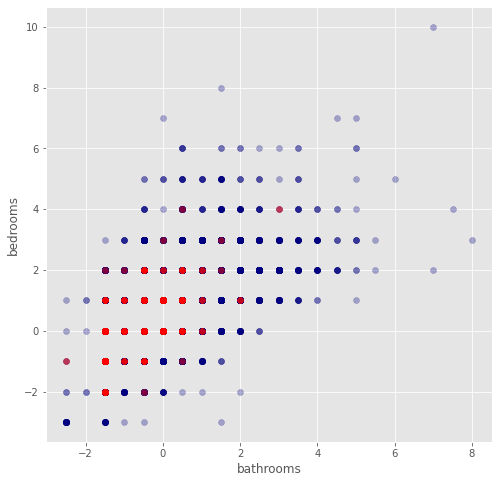

In [271]:
df_low_price = df_adj[df_adj['ln_price'] < -1.5]

fig, ax = plt.subplots( figsize = (8,8))

x_feat = 'ln_sqft_living'
y_feat = 'ln_sqft_above'

ax.scatter(x = df_adj[x_feat], y = df_adj[y_feat], color = (0.0,0.0,0.5,0.3))
ax.scatter(x = df_low_price[x_feat], y = df_low_price[y_feat], color = (1.0,0.0,0.0,0.5))
ax.set_xlabel(x_feat)
ax.set_ylabel(y_feat)

In [614]:
df[['price','sqft_living','sqft_above','sqft_basement','sqft_garage','sqft_patio','sqft_lot']].sort_values(by='sqft_lot')[0:10]

,price,sqft_living,sqft_above,sqft_basement,sqft_garage,sqft_patio,sqft_lot
16934,565000.0,680,460,220,0,230,402
8788,599950.0,960,960,0,0,210,412
12400,579950.0,1020,1020,0,0,330,420
3070,635950.0,1320,1000,320,0,290,435
1798,550000.0,1080,720,360,0,260,468
4310,799950.0,1270,960,310,0,300,474
2410,799950.0,1270,960,310,0,300,474
22211,815000.0,1270,960,310,0,300,474
11360,694950.0,1020,1020,0,0,260,475
24071,680000.0,1020,1020,0,0,260,475


Text(0, 0.5, 'ln_price')

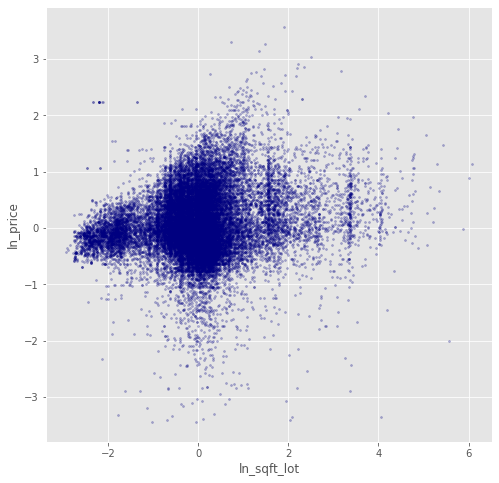

In [612]:
fig, ax = plt.subplots( figsize = (8,8))

x_feat = 'ln_sqft_lot'
y_feat = 'ln_price'

ax.scatter(x = np.cos(w)*df_adj[x_feat]+np.sin(w)*df_adj[y_feat], \
           y = -np.sin(w)*df_adj[x_feat]+np.cos(w)*df_adj[y_feat], \
           color = (0.0,0.0,0.5,0.3), \
           s=4)
ax.set_xlabel(x_feat)
ax.set_ylabel(y_feat)

In [610]:
w = 0*0.225 * 2*np.pi
np.corrcoef(np.cos(w)*df_adj[x_feat]+np.sin(w)*df_adj[y_feat],-np.sin(w)*df_adj[x_feat]+np.cos(w)*df_adj[y_feat])

array([[1.        , 0.30733717],
       [0.30733717, 1.        ]])

In [225]:
df.sort_values(by = 'price')

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,greenbelt,...,sqft_garage,sqft_patio,yr_built,yr_renovated,address,lat,long,state,zip,zip_id
8557,4438800170,2021-11-27,27360.0,2,1.0,730,7200,1.0,NO,NO,...,0,0,1954,0,"320 South 184th Street, Burien, Washington 981...",47.438045,-122.330870,Washington,98148,69
21793,7228502286,2022-01-26,27563.0,3,2.5,2320,2690,2.0,NO,NO,...,0,490,2008,0,"1528 19th Avenue, Seattle, Washington 98122, U...",47.614950,-122.306980,Washington,98122,26
7577,1626059005,2021-11-04,28307.0,2,1.0,1660,56809,1.0,NO,NO,...,0,0,1951,0,"15708 124th Avenue Northeast, Woodinville, Was...",47.742145,-122.174105,Washington,98072,44
20406,9475710010,2022-01-06,28559.0,3,2.5,1880,3755,2.0,NO,NO,...,430,190,2001,0,"417 Hoquiam Place Northeast, Renton, Washingto...",47.488920,-122.150680,Washington,98059,13
27028,7359600115,2021-11-27,28854.0,2,1.0,770,8400,1.0,NO,NO,...,0,60,1924,0,"3502 South 130th Street, Tukwila, Washington 9...",47.487250,-122.288210,Washington,98168,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18100,3304700355,2021-12-12,17800000.0,5,7.0,12470,92345,2.0,NO,NO,...,3390,520,1997,0,"69 Olympic Drive, Shoreline, Washington 98177,...",47.741150,-122.374255,Washington,98177,51
27175,5427300046,2021-09-27,20000000.0,4,6.5,7610,28800,1.0,YES,NO,...,660,1540,1966,2006,"605 Evergreen Point Road, Medina, Washington 9...",47.616095,-122.239600,Washington,98039,72
25561,624059038,2021-09-23,22750000.0,5,7.0,8160,32920,2.0,YES,NO,...,1020,400,2003,0,"2011 100th Avenue Northeast, Bellevue, Washing...",47.628725,-122.207360,Washington,98004,46
3760,3534900325,2021-09-23,23500000.0,4,5.0,4440,15494,2.0,YES,NO,...,900,2100,1990,2014,"4335 Hunts Point Road, Hunts Point, Washington...",47.650735,-122.230482,Washington,98004,46


In [405]:
df_low_price.iloc[12]

id                                                         3758300320
date                                              2021-12-08 00:00:00
bedrooms                                                            0
bathrooms                                                           0
floors                                                           -0.5
waterfront                                                         NO
greenbelt                                                          NO
nuisance                                                           NO
view                                                             NONE
condition                                                   Very Good
grade                                                              -1
heat_source                                                       Gas
sewer_system                                                   PUBLIC
yr_built                                                          -12
yr_renovated        

In [223]:
df.iloc[1207]

id                                                      3758300320
date                                           2021-12-08 00:00:00
price                                                        90000
bedrooms                                                         3
bathrooms                                                      2.5
sqft_living                                                   1580
sqft_lot                                                     10250
floors                                                           1
waterfront                                                      NO
greenbelt                                                       NO
nuisance                                                        NO
view                                                          NONE
condition                                                Very Good
grade                                                            7
heat_source                                                   

In [280]:
df_low_price.describe()

,id,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated,lat,long,zip,zip_id,ln_price,ln_sqft_living,ln_sqft_lot,ln_sqft_above,ln_sqft_basement,ln_sqft_garage,ln_sqft_patio
count,2.750000e+02,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000,275.000000
mean,4.466893e+09,0.141818,-0.629091,-0.187273,-1.181818,-15.240000,-94.701818,47.413638,-121.828555,97526.872727,28.647273,-2.064058,-0.217101,0.242814,-0.142917,-5.655548,-4.862724,-3.663496
std,2.864792e+09,1.031385,0.840723,0.462481,1.194435,28.300664,20.948804,0.696662,3.947849,5938.057012,20.066930,0.485438,0.434069,0.980832,0.422604,4.891103,4.953500,4.631224
min,7.200145e+06,-2.000000,-2.500000,-0.500000,-5.000000,-77.000000,-100.000000,40.266940,-122.506205,11772.000000,0.000000,-3.447850,-1.568616,-2.138930,-1.360977,-10.000000,-10.000000,-10.000000
25%,2.124064e+09,0.000000,-1.500000,-0.500000,-2.000000,-33.000000,-100.000000,47.365278,-122.315497,98030.500000,11.500000,-2.305118,-0.512601,-0.234998,-0.424883,-10.000000,-10.000000,-10.000000
50%,3.756100e+09,0.000000,-0.500000,-0.500000,-1.000000,-18.000000,-100.000000,47.476040,-122.262490,98070.000000,27.000000,-1.928619,-0.163745,0.090681,-0.174659,-10.000000,-0.854415,-1.011601
75%,7.312601e+09,1.000000,0.000000,0.500000,-1.000000,5.500000,-100.000000,47.567480,-122.178045,98144.000000,42.000000,-1.683324,0.094363,0.488525,0.144765,-0.157629,-0.071672,-0.046520
max,9.547205e+09,4.000000,3.000000,1.500000,5.000000,45.000000,18.000000,47.777230,-72.957270,98288.000000,78.000000,-1.505172,1.102078,5.564229,1.309718,0.634149,1.225026,1.776492


In [281]:
df_adj.describe()

,id,bedrooms,bathrooms,floors,grade,yr_built,yr_renovated,lat,long,zip,zip_id,ln_price,ln_sqft_living,ln_sqft_lot,ln_sqft_above,ln_sqft_basement,ln_sqft_garage,ln_sqft_patio
count,3.015400e+04,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000,30154.000000
mean,4.538203e+09,0.413511,-0.165318,0.043477,-0.348677,-1.837567,-95.615242,47.328062,-121.317377,96717.058069,27.595875,0.070092,-0.001508,0.005243,0.045329,-5.175340,-3.337628,-2.320586
std,2.882584e+09,0.981623,0.889519,0.567720,1.148971,32.066807,20.443968,1.434027,5.725569,9125.534016,20.877901,0.582885,0.442537,1.025463,0.449033,4.964569,4.707595,4.197599
min,1.000055e+06,-3.000000,-2.500000,-0.500000,-7.000000,-77.000000,-100.000000,21.274240,-157.791480,1541.000000,0.000000,-3.447850,-2.954910,-2.923536,-2.747271,-10.000000,-10.000000,-10.000000
25%,2.064800e+09,0.000000,-0.500000,-0.500000,-1.000000,-24.000000,-100.000000,47.405320,-122.326047,98030.000000,10.000000,-0.283042,-0.301668,-0.433254,-0.279171,-10.000000,-10.000000,-1.704748
50%,3.874206e+09,0.000000,0.000000,0.000000,0.000000,0.000000,-100.000000,47.551378,-122.225593,98059.000000,24.000000,0.000000,0.000000,0.000000,0.000000,-10.000000,-0.161268,-0.382992
75%,7.287100e+09,1.000000,0.500000,0.500000,0.000000,26.000000,-100.000000,47.669907,-122.116236,98117.000000,43.000000,0.413187,0.310754,0.346638,0.375094,-0.021053,0.081678,0.374693
max,9.904000e+09,10.000000,8.000000,2.500000,5.000000,45.000000,20.000000,64.824070,-70.074340,99705.000000,78.000000,3.576713,2.079442,6.075387,2.093762,2.122760,2.030385,2.988891


<AxesSubplot:xlabel='grade', ylabel='Probability'>

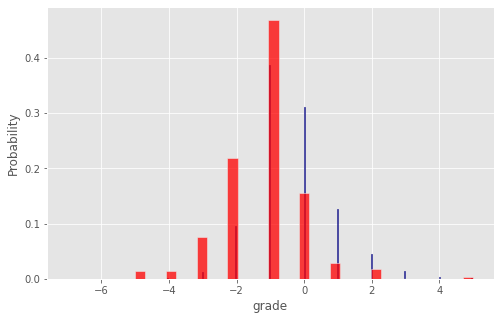

In [339]:
fig, ax = plt.subplots( figsize = (8,5) )
feat = 'grade'
stat = 'probability'
sns.histplot(df_adj[feat], ax = ax, color = (0.0,0.0,0.5,0.5), stat=stat)
sns.histplot(df_low_price[feat], ax = ax, color = (1.0,0.0,0.0,0.5), stat=stat)

On average, the very low price houses have:
Lower grades
Fewer bathrooms
Fewer bedrooms
Fewer floors
An earlier build date
Fewer square feet

In [279]:
x_feat = 'bedrooms'
y_feat = 'bathrooms'

print(sum( (df_adj[x_feat] < 0) & (df_adj[y_feat] < 0) & (df_adj['ln_price'] < -1.5) )/sum( df_adj['ln_price'] < -1.5 ))
print(sum( (df_adj[x_feat] < 0) & (df_adj[y_feat] < 0))/len( df_adj ))

0.24363636363636362
0.1284406712210652


In [266]:
257/(257+28525)

0.008929191856021125

In [267]:
18/(18+1354)

0.013119533527696793